# **✨ Clustering Models - Marketing Campaign by Datalicious ✨**

<!-- ![banner.png](https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/assets/banner.png) -->

![banner](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/e995058c-4aa2-4c39-adb6-5b4ba5e06fa2)

**✅ Members of Datalicious ✅**

1. Nur Imam Masri
2. Astuti Rahmawati
3. Prasidya Bagaskara
4. Moh. Harwin Prayoga
5. Riskiyatul Hasanah
6. M Rayhan Azzindani
7. Siti Hajjah Mardiah
8. Christine
9. M. Ifzal Asril

## **📍 Table of Content 📍**

- Data Cleansing/Preprocessing
    - Handling Missing Values
    - Handling Duplicated Rows
    - Handling Invalid Values
    - Handling Outliers
    - Feature Engineering / Extraction
    - Feature Transformation (Numeric)
    - Feature Encoding (Categoric)
    - Feature Selection
    - Feature Scaling
- Modelling & Evaluation
    - Indentifying the Number of Clusters
    - Clustering with RFM Analysis
    - Evaluation Model
- Final Presentation

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb)

- **Programming Language**

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Git and Github**

Repository : [Marketing Campaign Model Prediction by Datalicious](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious.git)

- **Libraries**

[Requirements Text](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/requirements.txt)

- **Dataset**

[Marketing campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign "Marketing campaign dataset from Kaggle")

# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📌 Import  Raw Datasets**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source, sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## **📌 Handling Missing Value**

Melakukan pengecekan jumlah Missing Values dan Persentase nya

In [4]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24    1.071429     int64
ID                                   0    0.000000     int64
Z_CostContact                        0    0.000000     int64
Complain                             0    0.000000    object
AcceptedCmp2                         0    0.000000    object
AcceptedCmp1                         0    0.000000   float64
AcceptedCmp5                         0    0.000000     int64
AcceptedCmp4                         0    0.000000     int64
AcceptedCmp3                         0    0.000000    object
NumWebVisitsMonth                    0    0.000000     int64
NumStorePurchases                    0    0.000000     int64
NumCatalogPurchases                  0    0.000000     int64
NumWebPurchases                      0    0.000000     int64
NumDealsPurchases                    0    0.000000     int64
Z_Revenue                            0    0.000000     in

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,07% dari keseluruhan data.

>

Pada proses handling missing values untuk kolom `Income` ada beberapa metode yang dapat di lakukan :
            
**Choice Determination:**

- Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

#### **Transform Temporary Data**

Transform beberapa kolom object/string, karena penggunaan multivariate approch memerlukan semua kolom numeric

In [5]:
df_ma = df.copy()

**Transform 1 - Label Encoding**

1. Menggunakan Metode `Mapping`

In [6]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}

df_ma['Education'] = df_ma['Education'].map(map_edu)
df_ma['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

**Transform 2 - One Hot Encoding**

1. Menggunakan `OneHotEncoder`

In [7]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df_ma[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
df_ma.drop("Marital_Status", axis=1, inplace=True)

print(oh.categories_[0])
df_ma = pd.concat([df_ma, df_ohe], axis=1)

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


**Transform 3 - Drop Date Columns**

In [8]:
df_ma = df_ma.drop("Dt_Customer", axis=1)

In [9]:
df_ma.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,1957,1,58138.000000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,2174,1954,1,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,4141,1965,1,71613.000000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,6182,1984,1,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,5324,1981,3,58293.000000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


#### **Implementation Multivariate Approach**

**Methods we use here to impute missing values**

- `MICE` or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `fancyimpute`.

**To install fancyimpute**

`pip install fancyimpute`

#### **Imputation using `MICE` with `LightGBM`**

MICE imputation can be made more efficient using the `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.

This package can be installed using either pip or conda, through conda-forge:

- Using pip 

    `pip install miceforest --no-cache-dir`

- Using conda

    `conda install -c conda-forge miceforest`

In [10]:
print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Jumlah missing values Income sebelum Imputation = 24


In [11]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  df_ma,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["Income"] = df_imputed["Income"].copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [12]:
print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

Jumlah missing values Income setelah Imputation = 0


### **Kesimpulan**

Berdasarkan hasil pengecekan, Untuk kolom `Income` terdapat missing values 24 rows (1,07%). Dikarenakan data kita terbatas, sehingga untuk prosesnya kita tidak akan melakukan penghapusan baris (Drop Rows), melainkan dilakukan proses Imputation. 

Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`. Imputasi MICE dapat lebih efisien menggunakan `miceforest` karena diharapkan kinerjanya jauh lebih baik karena mengimplementasikan algortima `lightgbm` di backend untuk melakukan imputasi. `LightGBM` dikenal dengan akurasi prediksi yang tinggi. Menggabungkannya dengan algortima `mice` menjadikannya algortima yang kuat untuk imputasi.

## **📌 Handling Duplicate Rows**

In [13]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [14]:
df.duplicated().sum()

0

In [15]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


In [16]:
df.duplicated(subset=["ID"]).sum()

0

### **Kesimpulan**

- Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data
- Pada pengecekan duplikat subset untuk ID tidak ditemukan ada nya ID customer yang sama

## **📌 Handling Invalid Values**

Mengecek isi unique values dari data

In [17]:
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

### **1. Melakukan konversi data `Date`**

Untuk mempermudah dalam proses feature extraction/engineering maka untuk data yang mengandung datetime akan dilakukan konversi ke format datetime pandas

In [18]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

### **2. Melakukan penyederhanaan `Marital_Status`**

Akan dilakukan replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data

- Mengganti kategori `Widow`, `Alone`, `Absurd`, `YOLO` menjadi `Single`
- Mengganti kategori `Together` menjadi `Married`
- Mempertahankan kategori `Divorced`

In [19]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [20]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### **3. Melakukan penyederhanaan `Education_Simple`**

Untuk kategori `2n Cycle` dan `Master` juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori `2n Cycle` akan dihapus dan digantikan dengan kategori `Master`.

In [21]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Kesimpulan**
Berdasarkan hasil pengecekan, Untuk kolom `Dt_Customer` sebelumnya masih berbentuk string/object, untuk tipe datanya kurang sesuai sehingga di ubah menjadi Datetime untuk diolah pada tahap Feature Engineering. Kemudian pada `Marital_Status` dan `Education` replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data.

## **📌 Handling Outliers**

Mengecek Outlier pada tiap columns

In [23]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 706
Not Outlier All Data : 1534



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Year_Birth,True,1932.000000,2004.000000,3,2237
1,Income,True,-14290.500000,118153.500000,8,2232
2,Kidhome,False,-1.500000,2.500000,0,2240
3,Teenhome,False,-1.500000,2.500000,0,2240
4,Recency,False,-51.000000,149.000000,0,2240
5,MntWines,True,-697.000000,1225.000000,35,2205
6,MntFruits,True,-47.000000,81.000000,227,2013
7,MntMeatProducts,True,-308.000000,556.000000,175,2065
8,MntFishProducts,True,-67.500000,120.500000,223,2017
9,MntSweetProducts,True,-47.000000,81.000000,248,1992


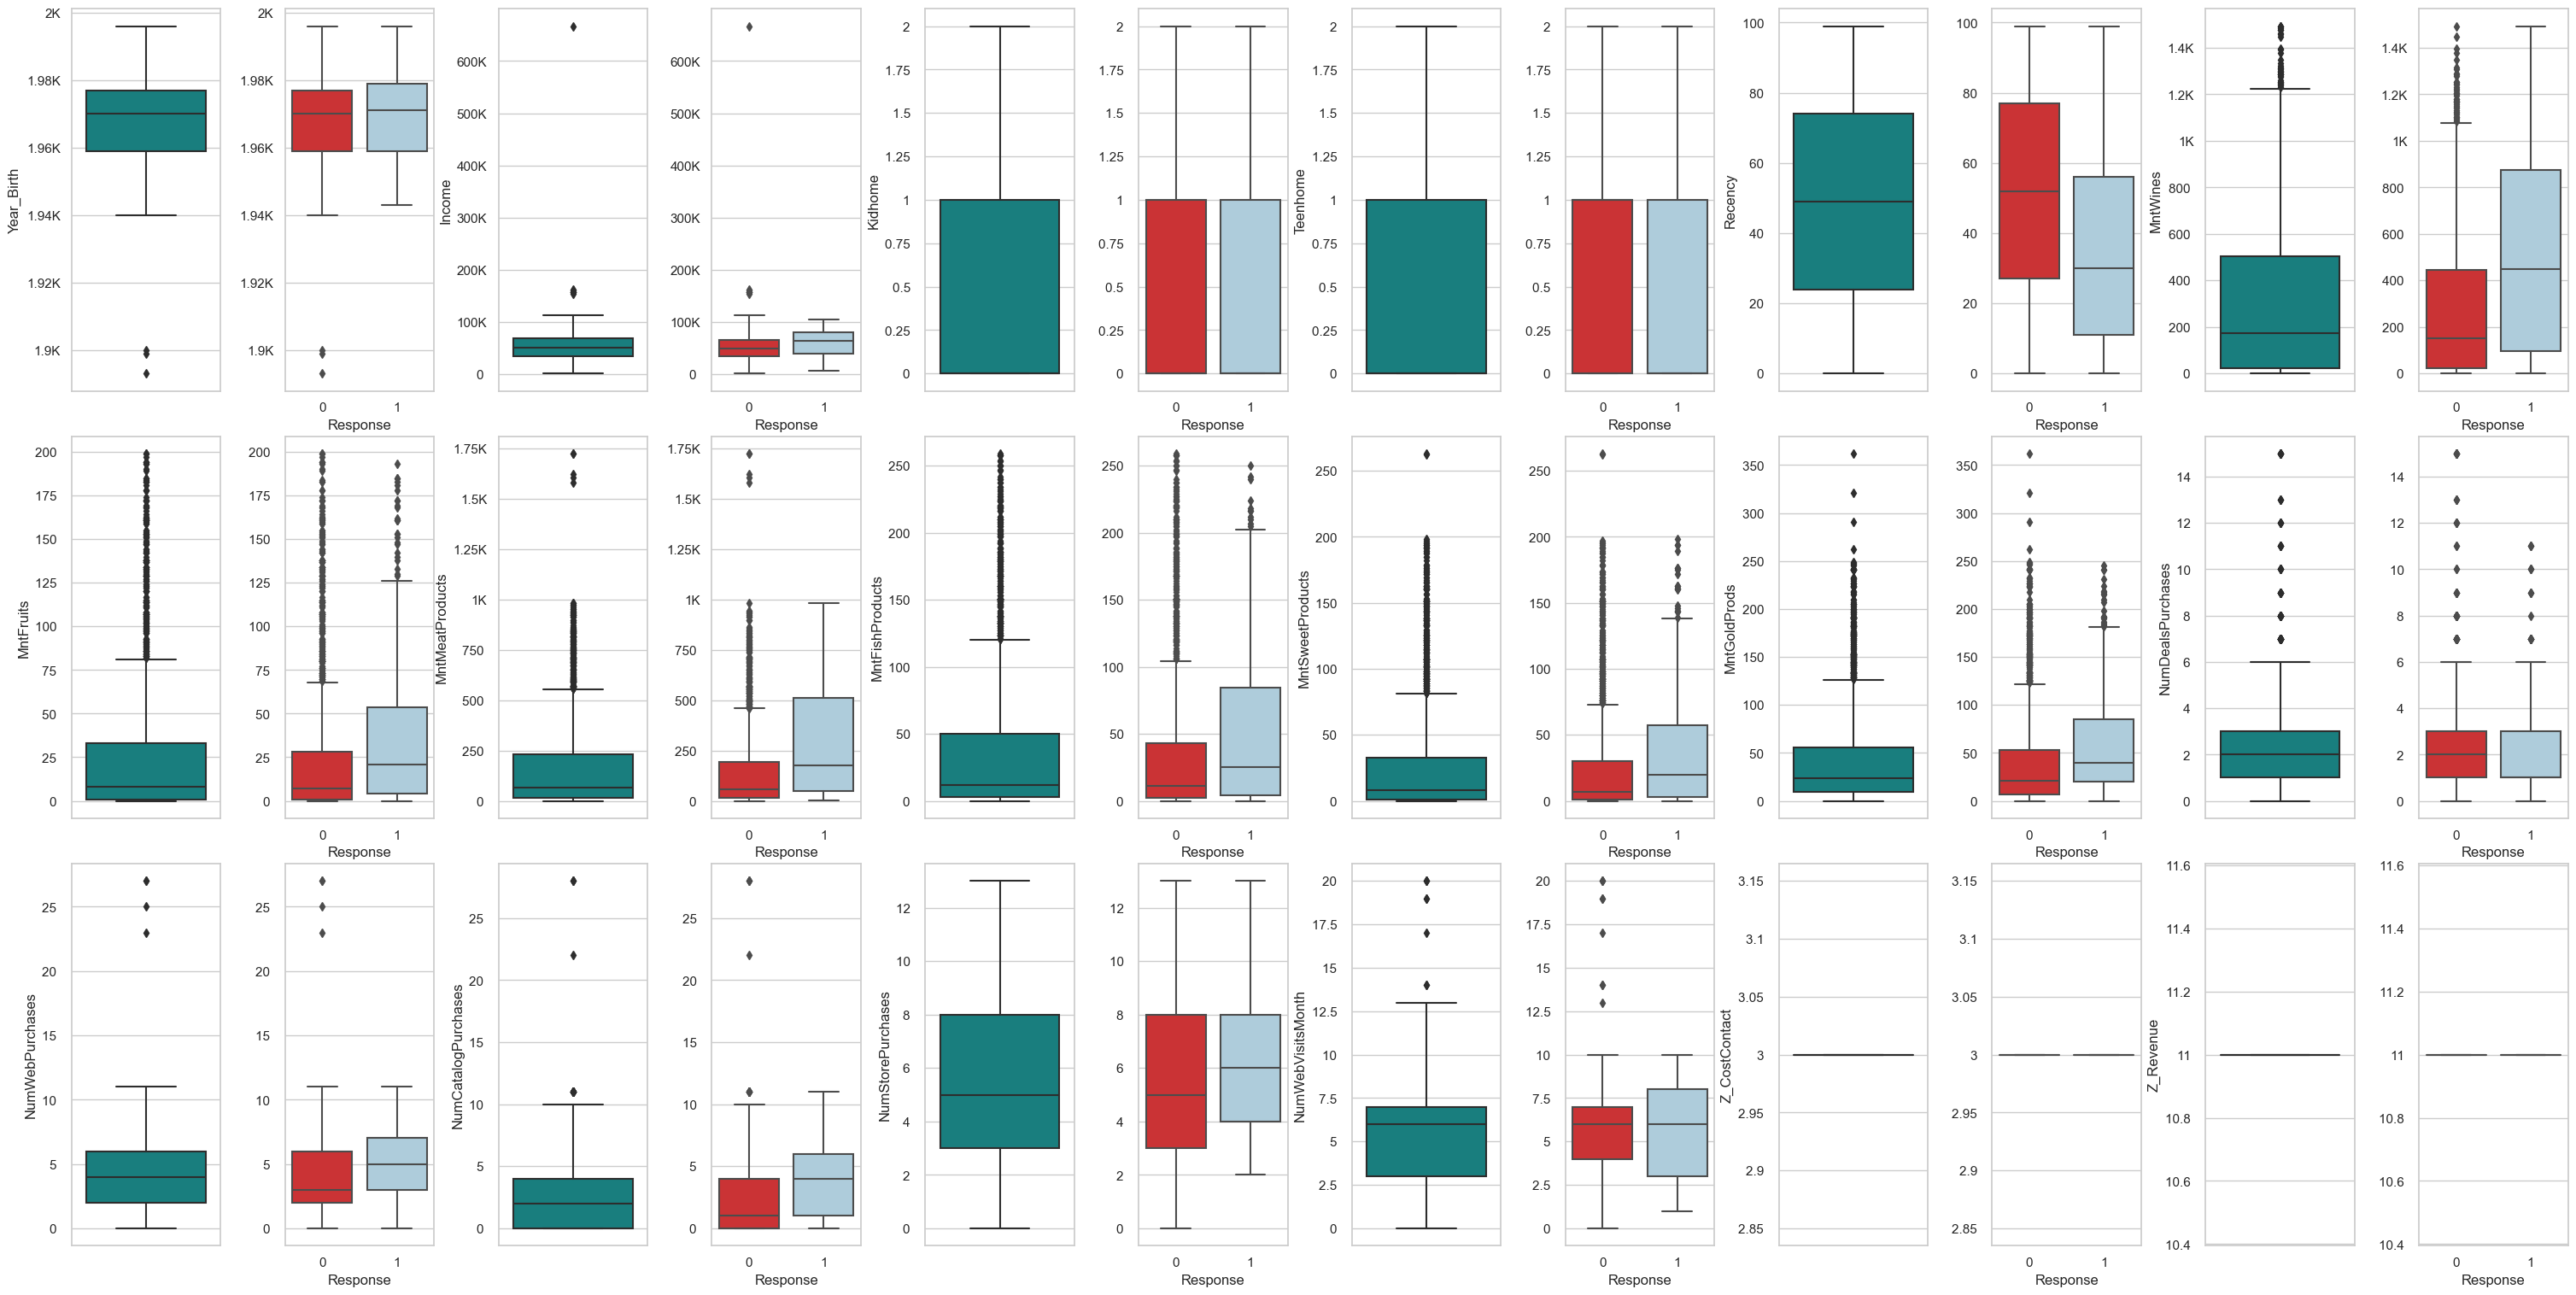

In [24]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

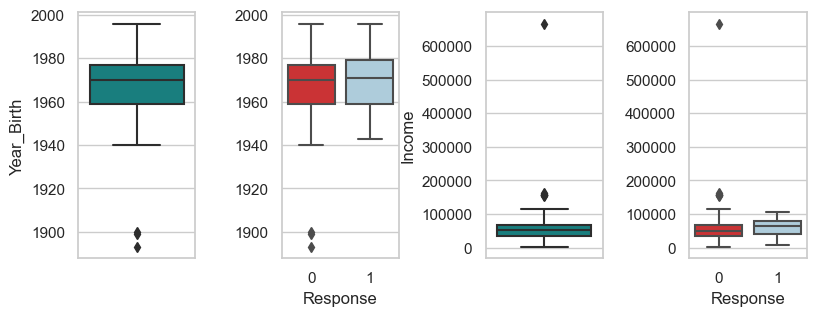

In [25]:
cols = ["Year_Birth","Income"]

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [26]:
df[["Year_Birth", "Income"]].describe()

,Year_Birth,Income
count,2240.000000,2240.000000
mean,1968.805804,52266.220089
std,11.984069,25129.051708
min,1893.000000,1730.000000
25%,1959.000000,35376.000000
50%,1970.000000,51381.500000
75%,1977.000000,68487.000000
max,1996.000000,666666.000000


Karena pada kolom `Year_Birth` memiliki nilai min yang sangat jauh di tahun `1893-1900`

dan `Income` memiliki nilai max yang sangat tinggi sebesar `$666.666`

Maka akan dilakukan Penghapusan rows pada nilai ini agar tidak ada ketimpangan nilai. Ada beberapa metode yang dapat kita lakukan :
- **Handling Oulier**
    - IQR (Interquartile Range)
    - Z-Score
- **Manually Trimmed**

**Choice Determination:**

- Untuk kasus saat ini, akan digunakan metode `Manually Trimmed`, agar menghindari penghapusan data yang terlalu banyak jika menggunakan Handling Outlier
- Adapaun pada kolom lainnya `selain Year_Birth dan Income` yang terdapat outlier tidak kita handle karena akan melalui proses `Normal Distribution Transformation` nantinya yang akan `mereduksi outliernya.`

### **Manually Trimmed**

- Kolom `Year_Birth`, menghapus nilai yang sangat jauh di tahun `1893-1900`
- Kolom `Income` menghapus nilai yang sangat tinggi sebesar `$666.666`

In [27]:
print("Jumlah data sebelum handling outliers :", df.shape[0])

df = df[~(df["Year_Birth"] <= 1900)]
print("Jumlah data setelah handling outliers (Year_Birth) : {}".format(df.shape[0]))

df = df[~(df["Income"] >= 666666)]
print("Jumlah data setelah handling outliers (Income) : {}".format(df.shape[0]))

Jumlah data sebelum handling outliers : 2240
Jumlah data setelah handling outliers (Year_Birth) : 2237
Jumlah data setelah handling outliers (Income) : 2236


In [28]:
df[["Year_Birth", "Income"]].describe()

,Year_Birth,Income
count,2236.000000,2236.000000
mean,1968.898032,51980.909213
std,11.703281,21518.486256
min,1940.000000,1730.000000
25%,1959.000000,35335.500000
50%,1970.000000,51371.000000
75%,1977.000000,68468.250000
max,1996.000000,162397.000000


**Mengecek hasil Trimmed / Drop Outliers**

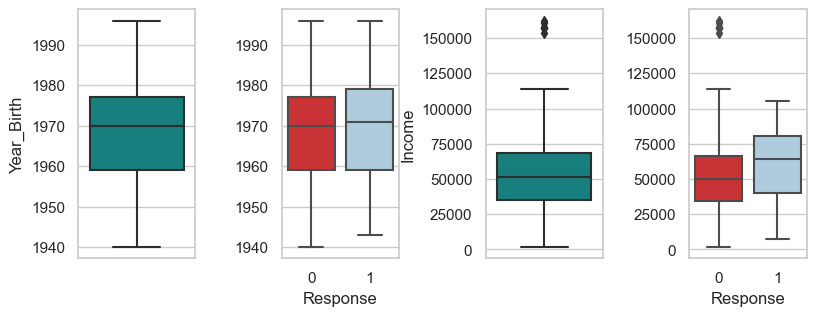

In [29]:
plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [30]:
df.reset_index(drop=True, inplace=True)

### **Kesimpulan**
Berdasarkan hasil perhitungan menggunakan `Z-score` dan juga `IQR`, dapat diketahui bahwa jumlah baris yang dihapus dari `Year_Birth` dan `Income` berdasarkan `IQR` untuk kolom  tidak jauh berbeda dibandingkan dengan `Z-score`, yaitu :
- IQR :
    - Jumlah data sebelum handling outliers : 2240
    - Jumlah data setelah handling outliers (Year_Birth) : 2237
    - Jumlah data setelah handling outliers (Income) : 2229

- Z_Score :
    - Jumlah data sebelum handling outliers : 2240
    - Jumlah data setelah handling outliers (Year_Birth) : 2237
    - Jumlah data setelah handling outliers (Income) : 2229

Namun, karena kita ingin meminimalisasi penghapusan data maka untuk proses ini kita memiliki `Manually Trimmed` agar tidak terlalu banyak data yang dihapus, jadi hanya berfokus pada data yang memiliki jauh yang sangat tinggi

- Jumlah data sebelum handling outliers : 2240
- Jumlah data setelah handling outliers (Year_Birth) : 2237
- Jumlah data setelah handling outliers (Income) : 2236

## **📌 Feature Engineering / Extraction**

Kita akan melakukan Calculation, Extraction, dan Binning features :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer (Lifetime)
- Spending
- Primer and Tersier product
- Total of Purchases
- Total_Cmp (Accepted Campaign 1-5)
- Ever_Accept (Accepted Campaign 1-5)
- Total Revenue
- Income Segment
- Conversion Rate Web
- Month Joined
- Recency Segment

**Membuat Kolom `Umur / Age`**

Berdasarkan data diketahui basis tahunnya : SAS Institute, 2014

In [31]:
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**Membuat Kolom `Age Group`** 

[source age group](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

<div>
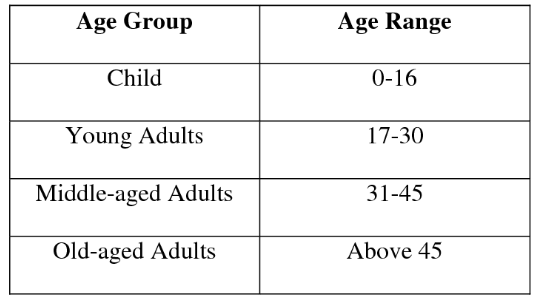
</div>

Akan disederhanakan lagi :
- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [32]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

**Membuat Kolom `Has_child`**

Menggabungkan Kidhome dan Teenhome menjadi feature Has_child, yang mana hasil penjumlahannya yang memiliki anak minimal 1

In [33]:
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

**Membuat Kolom `Dependents`**

Jumlah tanggungan dari customer, dari penjumlahan Kidhome dan Teenhome

In [34]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

**Membuat Kolom `Lifetime`**

Sudah berapa bulan customer sejak pembelian pertama di supermarket

In [35]:
df['Lifetime'] = (2014 - df["Dt_Customer"].dt.year)*12 + df["Dt_Customer"].dt.month

**Membuat Kolom `Spending`**

Jumlah pembelian tiap customer pada keseluruhan product

In [36]:
df['Spending']=df['MntWines']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

**Membuat Kolom `Primer and Tersier product`**

Jumlah pembelian tiap customer pada kelompok primer dan tersier product

In [37]:
# primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]

**Membuat Kolom `Total of Purchases`**

In [38]:
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

**Membuat Kolom `Total_Cmp`**

Berapa kali tiap customer merespon ke 5 campign yang dilaksanakan (AcceptedCmp 1 - 5)

In [39]:
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

**Membuat Kolom `Ever_Accept`**

Apakah Customer pernah minimal sekali menerima campign atau tidak pernah sama sekali

In [40]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Membuat Kolom `Total Revenue`**

Jumlah Campaign yang diresponse/accept (Campaign 1-5) dikali dengan revenue = 11

In [41]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

,Z_Revenue,Total_revenue
121,11,0
677,11,0
1317,11,0
824,11,0
585,11,11


**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68468)
- Medium -> q1(35335) - q3(68468)
- Low -> < q1(35335)

In [42]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35335.5
68468.25


In [43]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

**Membuat Kolom `Conversion Rate Web`**

Perbandingan Total Purchases dengan Jumlah Pengunjung Website

In [44]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Membuat Kolom `Month Joined`**

Membuat kolom extraction month dari tanggal Customer pertama kali berbelanja

Note : Untuk nilai tahun tidak digunakan karena berpotensi bias karena dari nilai nya akan increasing tiap waktu, sedangkan month akan repeat pada tiap periode

In [45]:
df['Month_joined'] = df['Dt_Customer'].dt.month

**Membuat Kolom `Recency_sgmt`**

In [46]:
np.sort(df['Recency'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [47]:
num_score = 5
cek = pd.qcut(df['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
cek = pd.DataFrame({
    "value":df['Recency'].unique(),
    "score": cek
})

cek.groupby(['score'])[['value']] \
    .agg(['min', 'max']).sort_index(ascending=False) \
    .style.background_gradient(cmap='Reds')

In [48]:
divided = {5: 19, 4: 39, 3: 59, 2: 79}
 
def RScore(x,d):
    if x <= d[5]:
        return 4
    elif x <= d[4]:
        return 3
    elif x <= d[3]: 
        return 2
    elif x <= d[2]: 
        return 1
    else:
        return 0

df['Recency_sgmt'] = df['Recency'].apply(lambda x: RScore(x, divided))
df.groupby(['Recency_sgmt'])[['Recency']].agg(['min', 'max', 'count']).style.background_gradient(cmap='Reds')

Perkiraan pembagian dengan rentang 19 Hari:
- 4 score -> setengah bulan
- 3 score -> 1 bulan
- 2 score -> 1 setengah bulan
- 1 score -> 2 bulan
- 0 score -> 3 bulan

**Mengecek nilai Extraction**

In [49]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt
1598,5453,1956,Master,Married,90226.000000,0,0,2012-09-26,26,1083,108,649,253,151,108,1,4,7,12,2,0,0,0,1,0,0,3,11,0,58,Senior Adult,0,0,33,2352,1010,1342,24,1,1,11,High,12.000000,9,3
1603,8969,1977,Graduation,Married,71855.000000,0,1,2013-01-16,59,548,31,422,0,112,28,4,5,5,11,3,0,0,0,0,0,0,3,11,0,37,Adult,1,1,13,1141,453,688,25,0,0,0,High,8.330000,1,2
2009,500,1977,Graduation,Married,96876.000000,0,0,2013-08-06,79,908,43,735,40,194,21,1,7,7,9,2,0,1,1,1,0,0,3,11,1,37,Adult,0,0,20,1941,818,1123,24,3,1,33,High,12.000000,8,1
795,3749,1973,Graduation,Married,73926.000000,0,0,2013-03-02,54,627,91,597,159,91,15,1,6,5,12,3,0,0,0,0,0,0,3,11,0,41,Adult,0,0,15,1580,847,733,24,0,0,0,High,8.000000,3,2
163,10095,1975,PhD,Divorced,74165.000000,0,0,2013-05-01,9,1001,12,240,16,12,12,1,5,4,10,2,0,0,0,0,0,0,3,11,0,39,Adult,0,0,17,1293,268,1025,20,0,0,0,High,10.000000,5,4


**Categorical (String)**

- Education - Basic, Graduation, Master, PhD
- Marital_Status - Single, Married, Divorced
- Age_group - Young Adult, Adult, Senior Adult
- Income_sgmt - High, Medium, Low

**Categorical (Int)**

- ID
- Kidhome - 0, 1, 2
- Teenhome - 0, 1, 2
- AcceptedCmp1 - 0, 1
- AcceptedCmp2 - 0, 1
- AcceptedCmp3 - 0, 1
- AcceptedCmp4 - 0, 1
- AcceptedCmp5 - 0, 1
- Ever_Accept - 0, 1
- Complain - 0, 1
- Response - 0, 1
- Has_child - 0, 1
- Recency_sgmt - 0, 1, 2, 3, 4

**Numericals**

- Year_Birth = 1940 - 1996
- Income = 1730.0 - 162397.0
- Kidhome = 0 - 2
- Teenhome = 0 - 2
- Recency = 0 - 99
- Age = 18 - 74
- Dependents = 0 - 3
- Lifetime = 1 - 36
- Spending = 5 - 2525
- Primer_purchase = 1 - 1727
- Tersier_purchase = 3 - 1689
- Total_Purchases = 0 - 44
- NumWebVisitsMonth = 0 - 20
- Conversion_rate_web = 0.0 - 43.0
- Total_Cmp = 0 - 4
- Total_revenue = 0 - 44
- Month_joined = 1 - 12

**Numericals (one)**

- Z_CostContact = 3
- Z_Revenue = 11

**Numericals (Product)**

- MntWines = 0 - 1493
- MntFruits = 0 - 199
- MntMeatProducts = 0 - 1725
- MntFishProducts = 0 - 259
- MntSweetProducts = 0 - 263
- MntGoldProds = 0 - 362

**Numericals (Purchases)**

- NumDealsPurchases = 0 - 15
- NumWebPurchases = 0 - 27
- NumCatalogPurchases = 0 - 28
- NumStorePurchases = 0 - 13

**Timestamp**
- Dt_Customer = 2012-07-30 - 2014-06-29

In [50]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child', 'Recency_sgmt']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

Mengecek Kolom di pembagian type

In [51]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df:
    if i not in allcol:
        print(i)

In [52]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df[x]), max(df[x])))

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[1, 0]

===== Has_child =====
[0, 1]

===== Recency_sgmt =====
[2, 3, 0, 4, 1]

Year_Birth = 1940 - 1996
Income = 1730.0 - 162397.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 74
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primer_purchase = 1 - 1727
Tersier_purchase = 3 - 1689
Total_Purchases = 0 - 44
NumWebVisitsMonth = 0 - 20
Conv

In [53]:
new_cols = list(df.columns.values)
new_cols.remove("Response")
new_cols.append("Response")
df = df[new_cols].copy()

In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age',
       'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'Total_Cmp',
       'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web',
       'Month_joined', 'Recency_sgmt', 'Response'],
      dtype='object')

## **📌 Feature Transformation (Numeric)**

Mengecek Skewness di tiap kolom untuk menentukan jenis Transformation

In [55]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Kidhome,0.636000,-0.779000,Bimodal Distribution
1,Teenhome,0.406000,-0.987000,Bimodal Distribution
2,Conversion_rate_web,2.332000,6.442000,Highly Positively Skewed
3,MntFishProducts,1.919000,3.086000,Highly Positively Skewed
4,MntFruits,2.103000,4.058000,Highly Positively Skewed
5,MntGoldProds,1.884000,3.548000,Highly Positively Skewed
6,MntMeatProducts,2.084000,5.515000,Highly Positively Skewed
7,MntSweetProducts,2.134000,4.360000,Highly Positively Skewed
8,MntWines,1.175000,0.597000,Highly Positively Skewed
9,NumCatalogPurchases,1.880000,8.030000,Highly Positively Skewed


In [56]:
exclude = ["Kidhome", "Teenhome", "Dependents", "Total_Cmp"]

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Normalisasi/Standardization =", norm_cols)

Log Transformation = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primer_purchase', 'Spending', 'Tersier_purchase', 'Total_revenue']
Normalisasi/Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth']


Dari hasil temuan, kita dapat menentukan beberapa transformasi yang akan kita lakukan :
- **Scaling and Converting to a Normal Distribution :**
    - log Transformation
    - Box-Cox Transformation
    - Yeo-Johnson Transformation
    
    **Adapun daftar column yang akan kita transform pada proses ini :**
        - Conversion_rate_web
        - MntFishProducts
        - MntFruits
        - MntGoldProds
        - MntMeatProducts
        - MntSweetProducts
        - MntWines
        - NumCatalogPurchases
        - NumDealsPurchases
        - NumStorePurchases
        - NumWebPurchases
        - Primer_purchase
        - Spending
        - Tersier_purchase
        - Total_revenue
    
- **Just Scaling :**
    - Normalization
    - Standardization
    
    **Adapun daftar column yang akan kita transform pada proses ini :**
        - Age
        - Income
        - Lifetime
        - Month_joined
        - NumWebVisitsMonth
        - Recency
        - Total_Purchases
        - Year_Birth

- Sedangkan untuk beberapa kolom yang **tidak perlu melakukan Transformasi** karena rentang nilai yang masih wajar sebagai berikut :
    - Kidhome
    - Teenhome
    - Dependents
    - Total_Cmp

**Choice Determination:**

- Pada proses `Scaling and Converting to a Normal Distribution` ini kita menggunakan `Yeo-Johnson Transformation`, karena dari hasilnya kita bisa melihat hasil bentuk curve yang lebih Normal Distribusi
- Pada proses `Just Scaling` ini kita menggunakan `Normalization` karena lebih robust untuk algoritma yang akan kita gunakan 

### **Yeo-Johnson Transformation**

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.

It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

- **with sklearn**

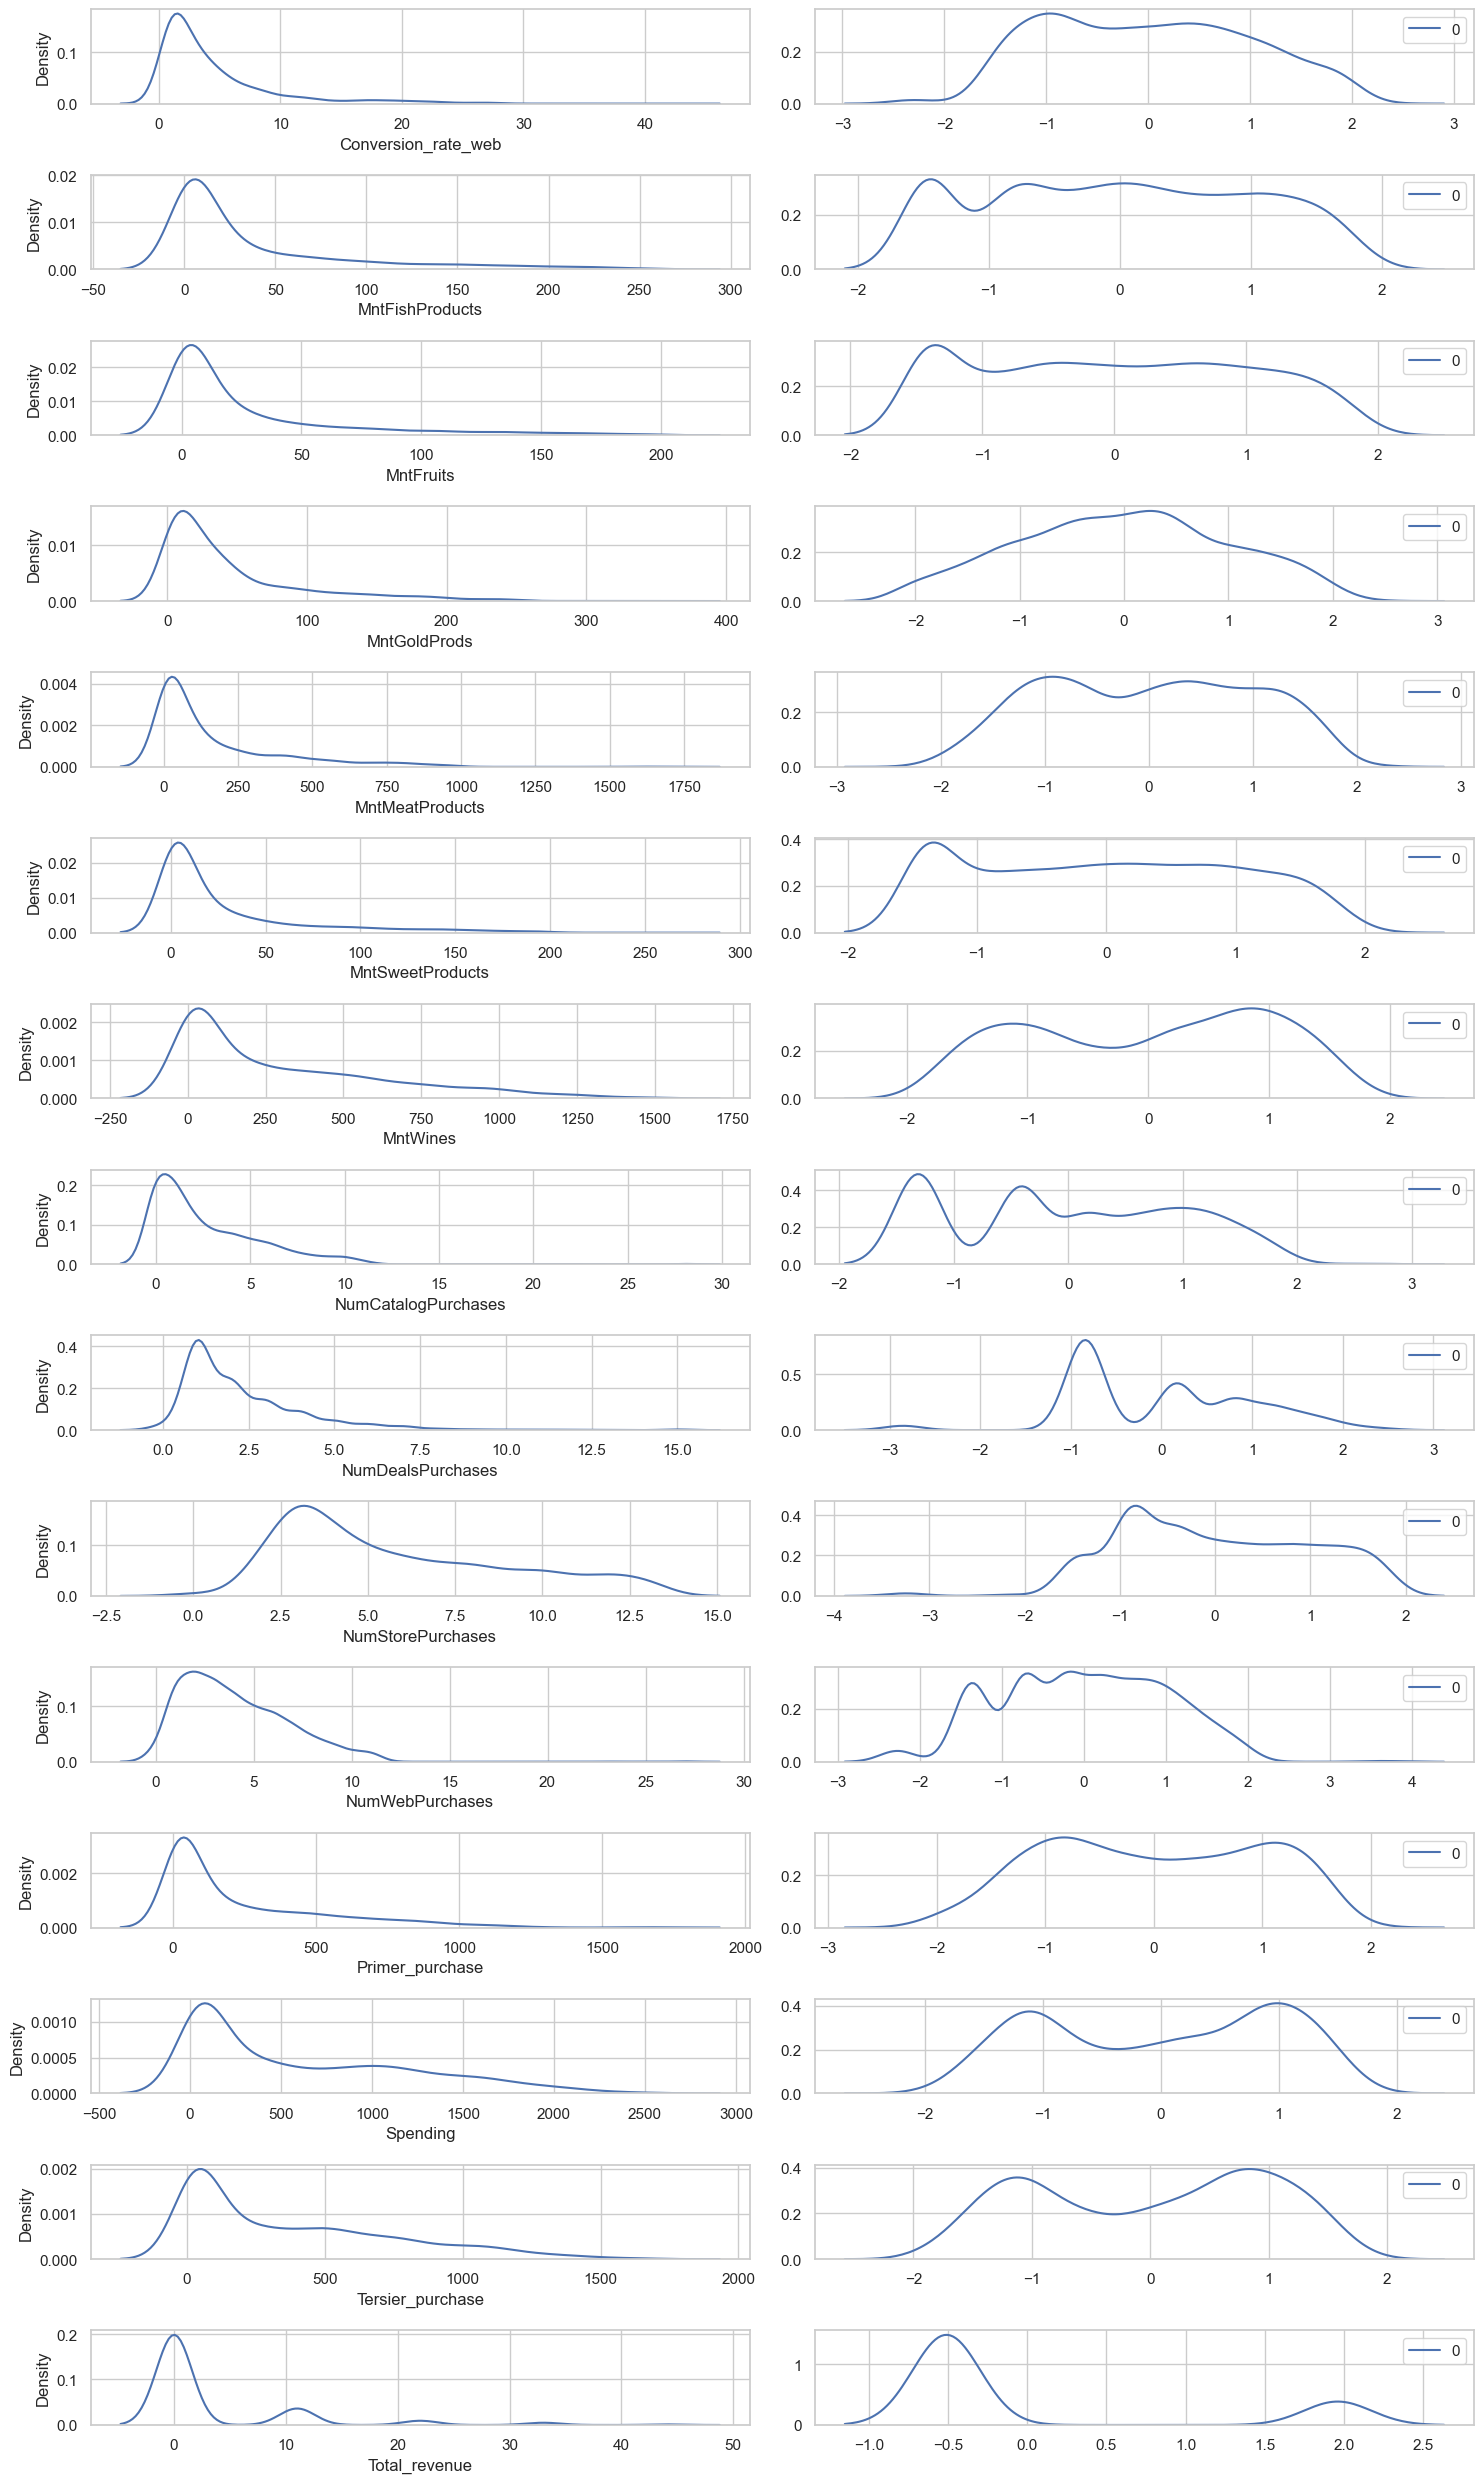

In [57]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [58]:
pt = PowerTransformer(method='yeo-johnson')
df[log_cols] = pt.fit_transform(df[log_cols])

In [59]:
df[log_cols].describe()

,Conversion_rate_web,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,Primer_purchase,Spending,Tersier_purchase,Total_revenue
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
std,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224
min,-2.602504,-1.509682,-1.454849,-2.138575,-2.511714,-1.434003,-1.970872,-1.338023,-3.011224,-3.392032,-2.362005,-2.314924,-2.069143,-1.976478,-0.510313
25%,-0.842434,-0.700799,-0.985311,-0.688205,-0.838594,-0.971157,-0.910486,-1.338023,-0.820155,-0.862779,-0.709381,-0.834912,-0.980100,-0.975561,-0.510313
50%,-0.020798,0.003254,-0.001432,0.003732,0.034712,-0.001681,0.126169,0.158930,0.158137,-0.046922,0.185183,-0.038389,0.131289,0.133407,-0.510313
75%,0.747966,0.838983,0.829614,0.691078,0.842366,0.816780,0.874655,0.799974,0.744158,0.806247,0.823842,0.891399,0.916149,0.869321,-0.510313
max,2.363106,1.862577,1.884177,2.492608,2.222716,2.012128,1.812958,2.767807,2.658365,1.780425,3.933317,2.046915,1.757460,1.840735,1.985443


### **Normalization**

In [60]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df[norm_cols] = pd.DataFrame(scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [61]:
df[norm_cols].describe()

,Age,Income,Lifetime,Month_joined,NumWebVisitsMonth,Recency,Total_Purchases,Year_Birth
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.483964,0.312764,0.489522,0.496910,0.265944,0.496124,0.338012,0.516036
std,0.208987,0.133932,0.306805,0.317167,0.121344,0.292498,0.174497,0.208987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.209162,0.342857,0.181818,0.150000,0.242424,0.181818,0.339286
50%,0.464286,0.308968,0.485714,0.454545,0.300000,0.494949,0.340909,0.535714
75%,0.660714,0.415382,0.657143,0.818182,0.350000,0.747475,0.477273,0.660714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Standardization**

In [62]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# df[norm_cols] = pd.DataFrame(std_scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [63]:
# df[norm_cols].describe()

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan transformation sebelumnya, dapat diketahui bahwa keseluruhan nilai skewnessnya sudah memiliki rentang yang lebih seragam (tidak jauh dan tidak terlalu bervariasi). Sehingga dapat disimpulkan bahwa teknik fitur transformation yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Encoding (Categoric)**


Mengecek feature categorical yang masih memiliki nilai betype string/object

In [64]:
#cek unique value
for x in cat_str: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']



In [65]:
cat_str

['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']

Dari hasil temuan, kita dapat menentukan beberapa encoding yang akan kita lakukan :
- **Label Encoding :**
    - LabelEncoder
    - Manually Mapped
    
    **Adapun daftar column yang akan kita proses :**
    - `Education` - Basic (0), Graduation (1), Master (2), PhD (3)
    - `Age_group` - Young Adult (0), Adult (1), Senior Adult (2)
    - `Income_sgmt` - Low (0), Medium (1), High (2)
    
- **One Hot Encoding :**
    - get_dummies
    - OneHotEncoder
    
    **Adapun daftar column yang akan kita proses :**
    - `Marital_Status` - Single, Married, Divorced

**Choice Determination:**

- Pada proses `Label Encoding` ini kita menggunakan `Manually Mapped`, karena kita bisa menentukan secara fleksible urutan/order dari categorical feature
- Pada proses `One Hot Encoding` ini kita menggunakan `OneHotEncoder`, karena hasil encodingnya lebih rapi dan lebih mudah untuk dilakukan adjust

### **Label Encoding**

1. Menggunakan Metode `Mapping`

In [66]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(map_edu)
df['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

In [67]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df['Age_group'] = df['Age_group'].map(map_age)
df['Age_group'].unique()

array([2, 0, 1], dtype=int64)

In [68]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df['Income_sgmt'] = df['Income_sgmt'].map(map_income)
df['Income_sgmt'].unique()

array([1, 2, 0], dtype=int64)

In [69]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response
0,5524,0.303571,1,Single,0.351086,0,0,2012-09-04,0.585859,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,1.726261,-0.418298,0.350000,0,0,0,0,0,0,3,11,0.696429,2,0,0,0.914286,1.315785,1.477134,1.116046,0.568182,0,0,-0.510313,1,0.322257,0.727273,2,1
1,2174,0.250000,1,Single,0.277680,1,1,2014-03-08,0.383838,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,-0.374162,-1.419908,0.250000,0,0,0,0,0,0,3,11,0.750000,2,1,2,0.057143,-1.442462,-1.409056,-1.363875,0.136364,0,0,-0.510313,1,-0.859340,0.181818,3,0
2,4141,0.446429,1,Married,0.434956,0,0,2013-08-21,0.262626,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,0.158930,1.242818,0.200000,0,0,0,0,0,0,3,11,0.553571,2,0,0,0.542857,0.660253,0.740554,0.671920,0.477273,0,0,-0.510313,2,0.729193,0.636364,3,0
3,6182,0.785714,1,Married,0.155079,1,0,2014-02-10,0.262626,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,-1.338023,-0.418298,0.300000,0,0,0,0,0,0,3,11,0.214286,0,1,1,0.028571,-1.118746,-0.650506,-1.340485,0.181818,0,0,-0.510313,0,-0.753151,0.090909,3,0
4,5324,0.732143,3,Married,0.352051,1,0,2014-01-19,0.949495,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,0.524042,0.272951,0.250000,0,0,0,0,0,0,3,11,0.267857,1,1,1,0.000000,0.177763,0.515865,0.035887,0.431818,0,0,-0.510313,1,0.389599,0.000000,0,0


### **One Hot Encoding**

1. Menggunakan `OneHotEncoder`

In [70]:
oh.fit_transform(df[["Marital_Status"]])

<2236x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2236 stored elements in Compressed Sparse Row format>

In [71]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
print(oh.categories_[0])

df.drop("Marital_Status", axis=1, inplace=True)

df = pd.concat([df, df_ohe], axis=1)

['Divorced' 'Married' 'Single']


### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan encoding sebelumnya, dapat diketahui bahwa keseluruhan nilai telah beripe numeric sesuai dengan nilai yang kita assign. Sehingga dapat disimpulkan bahwa teknik fitur encoding yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Selection**

### **1. Drop Unnecessary Feature**

- Drop kolom `ID` karena memiliki banyak kategori dan tidak berguna untuk pemodelan
- Drop kolom `Year_Birth` sudah dilakukan Feature extraction untuk mengambil data Umur/Age pada range tahun saat ini 2014 (sesuai pada data)
- Drop kolom `Dt_Customer` karena tidak terlalu mempengaruhi model prediksi
- Drop kolom `Z_CostContact` (3) dan `Z_Revenue` (11) karena  hanya memiliki satu nilai, tidak memberikan informasi yang signifikan terhadap model prediksi

In [72]:
clus_df = df.copy()
clus_df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)
clus_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response,Divorced,Married,Single
0,1,0.351086,0,0,0.585859,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,1.726261,-0.418298,0.350000,0,0,0,0,0,0,0.696429,2,0,0,0.914286,1.315785,1.477134,1.116046,0.568182,0,0,-0.510313,1,0.322257,0.727273,2,1,0.000000,0.000000,1.000000
1,1,0.277680,1,1,0.383838,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,-0.374162,-1.419908,0.250000,0,0,0,0,0,0,0.750000,2,1,2,0.057143,-1.442462,-1.409056,-1.363875,0.136364,0,0,-0.510313,1,-0.859340,0.181818,3,0,0.000000,0.000000,1.000000
2,1,0.434956,0,0,0.262626,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,0.158930,1.242818,0.200000,0,0,0,0,0,0,0.553571,2,0,0,0.542857,0.660253,0.740554,0.671920,0.477273,0,0,-0.510313,2,0.729193,0.636364,3,0,0.000000,1.000000,0.000000
3,1,0.155079,1,0,0.262626,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,-1.338023,-0.418298,0.300000,0,0,0,0,0,0,0.214286,0,1,1,0.028571,-1.118746,-0.650506,-1.340485,0.181818,0,0,-0.510313,0,-0.753151,0.090909,3,0,0.000000,1.000000,0.000000
4,3,0.352051,1,0,0.949495,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,0.524042,0.272951,0.250000,0,0,0,0,0,0,0.267857,1,1,1,0.000000,0.177763,0.515865,0.035887,0.431818,0,0,-0.510313,1,0.389599,0.000000,0,0,0.000000,1.000000,0.000000


## **📌 Feature Scalling**

In [73]:
# for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(clus_df)
clus_dfsc = pd.DataFrame(scaler.transform(clus_df), columns= clus_df.columns )
clus_dfsc.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response,Divorced,Married,Single
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224,1.000224
min,-1.983191,-2.335766,-0.824939,-0.930615,-1.696543,-1.970872,-1.454849,-2.511714,-1.509682,-1.434003,-2.138575,-3.011224,-2.362005,-1.338023,-3.392032,-2.192136,-0.280410,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-2.316276,-1.978301,-1.584362,-1.264308,-1.595905,-2.069143,-2.314924,-1.976478,-1.937498,-0.438933,-0.510322,-0.510313,-1.414214,-2.602504,-1.567064,-1.420591,-0.419052,-0.339429,-1.347635,-0.580104
25%,-0.792105,-0.773713,-0.824939,-0.930615,-0.867550,-0.910486,-0.985311,-0.838594,-0.700799,-0.971157,-0.688205,-0.820155,-0.709381,-1.338023,-0.862779,-0.955707,-0.280410,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.692437,-0.493413,-1.584362,-1.264308,-0.478147,-0.980100,-0.834912,-0.975561,-0.895310,-0.438933,-0.510322,-0.510313,-0.353553,-0.842434,-0.993679,-0.715029,-0.419052,-0.339429,-1.347635,-0.580104
50%,-0.792105,-0.028350,-0.824939,-0.930615,-0.004016,0.126169,-0.001432,0.034712,0.003254,-0.001681,0.003732,0.158137,0.185183,0.158930,-0.046922,0.280722,-0.280410,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.094180,-0.493413,0.631169,0.065416,-0.012414,0.131289,-0.038389,0.133407,0.016605,-0.438933,-0.510322,-0.510313,0.000000,-0.020798,-0.133602,-0.009466,-0.419052,-0.339429,0.742041,-0.580104
75%,0.398982,0.766366,1.032627,0.905974,0.859517,0.874655,0.829614,0.842366,0.838983,0.816780,0.691078,0.744158,0.823842,0.799974,0.806247,0.692865,-0.280410,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,0.845938,0.991475,0.631169,0.065416,0.546465,0.916149,0.891399,0.869321,0.798246,-0.438933,-0.510322,-0.510313,0.353553,0.747966,1.013168,0.696096,-0.419052,-0.339429,0.742041,1.723827
max,1.590069,5.132368,2.890194,2.742564,1.723051,1.812958,1.884177,2.222716,1.862577,2.012128,2.492608,2.658365,3.933317,2.767807,1.780425,6.050723,3.566201,3.519833,3.578054,3.811532,8.575158,10.526158,2.469777,0.991475,0.631169,2.724862,1.664223,1.757460,2.046915,1.840735,3.794537,5.455681,1.959548,1.985443,1.414214,2.363106,1.586553,1.401659,2.386338,2.946125,0.742041,1.723827


# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

# **🔥 Clustering Model 🔥**

## **📌 Identifying the Number of Clusters**

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. <br>
Distortion is calculated as the average of the squared distances (let’s say Euclidean distance) from the cluster centers of the respective clusters. Inertia represents the sum of squared distances of samples to their closest cluster center.

### **Elbow Method**

In [74]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(clus_dfsc)
    inertia.append(km.inertia_)

<Axes: >

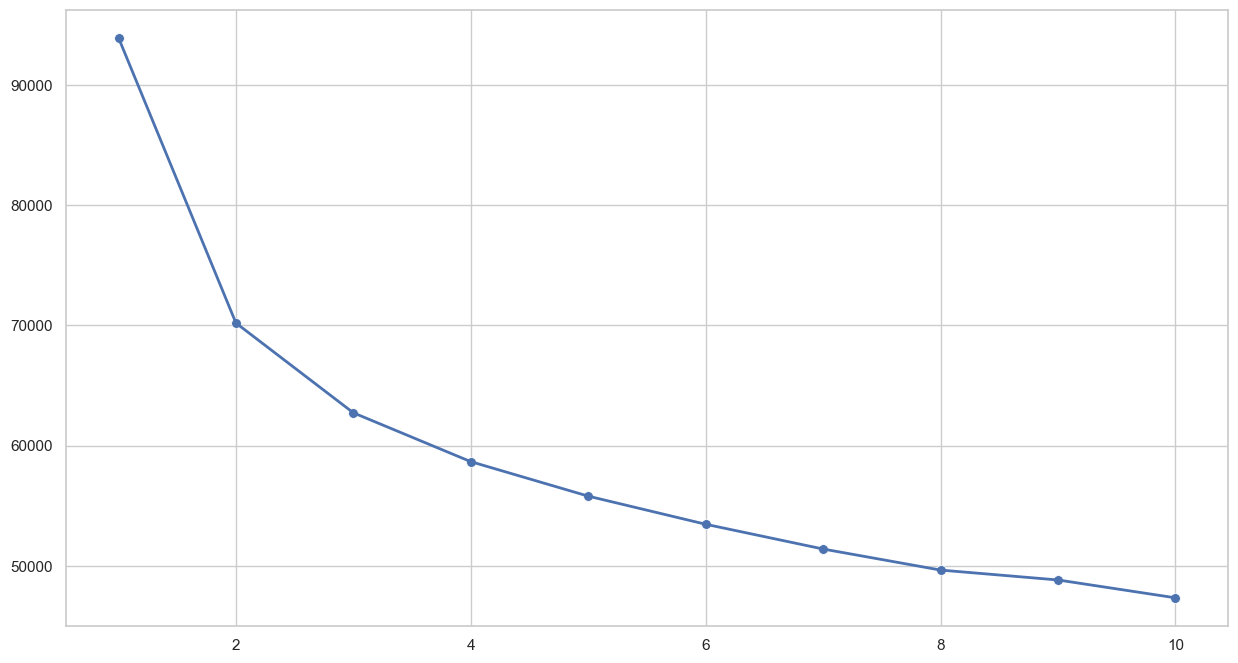

In [75]:
sns.lineplot(x=range(1, 11), y=inertia, linewidth=2)
sns.scatterplot(x=range(1, 11), y=inertia, s=50)

In [76]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0   25.252919
1   10.632353
2    6.473955
3    4.885154
4    4.189489
5    3.849898
6    3.403908
7    1.657230
8    3.037698
9         NaN
dtype: float64

### **Kesimpulan**

Berdasarkan hasil penentuan jumlah clustering dengan elbow method perubahan tidak berubah signifikan pada 4 cluster, maka akan dibagi menjadi ke 4 cluster.

## **📌 K Means Clustering without Dimensionality Reduction**

In [77]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(clus_dfsc)
#Adding the Clusters feature to the orignal dataframe.
clus_df["cluster_km_orig"] = kmeans.labels_
df["cluster_KM_orig"] = kmeans.labels_
# Get the predictions
predictions = kmeans.predict(clus_dfsc)
clus_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response,Divorced,Married,Single,cluster_km_orig
0,1,0.351086,0,0,0.585859,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,1.726261,-0.418298,0.350000,0,0,0,0,0,0,0.696429,2,0,0,0.914286,1.315785,1.477134,1.116046,0.568182,0,0,-0.510313,1,0.322257,0.727273,2,1,0.000000,0.000000,1.000000,1
1,1,0.277680,1,1,0.383838,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,-0.374162,-1.419908,0.250000,0,0,0,0,0,0,0.750000,2,1,2,0.057143,-1.442462,-1.409056,-1.363875,0.136364,0,0,-0.510313,1,-0.859340,0.181818,3,0,0.000000,0.000000,1.000000,2
2,1,0.434956,0,0,0.262626,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,0.158930,1.242818,0.200000,0,0,0,0,0,0,0.553571,2,0,0,0.542857,0.660253,0.740554,0.671920,0.477273,0,0,-0.510313,2,0.729193,0.636364,3,0,0.000000,1.000000,0.000000,1
3,1,0.155079,1,0,0.262626,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,-1.338023,-0.418298,0.300000,0,0,0,0,0,0,0.214286,0,1,1,0.028571,-1.118746,-0.650506,-1.340485,0.181818,0,0,-0.510313,0,-0.753151,0.090909,3,0,0.000000,1.000000,0.000000,2
4,3,0.352051,1,0,0.949495,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,0.524042,0.272951,0.250000,0,0,0,0,0,0,0.267857,1,1,1,0.000000,0.177763,0.515865,0.035887,0.431818,0,0,-0.510313,1,0.389599,0.000000,0,0,0.000000,1.000000,0.000000,0


In [78]:
#PCA for visualization 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(clus_dfsc)
PCA_ds = pd.DataFrame(pca.transform(clus_dfsc), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.000000,0.000000,3.694741,-8.011708,-3.474995,-0.023921,3.172708,8.333299
col2,2236.000000,0.000000,2.015108,-3.594270,-1.475363,-0.226758,0.997178,9.168798


<Axes: xlabel='col1', ylabel='col2'>

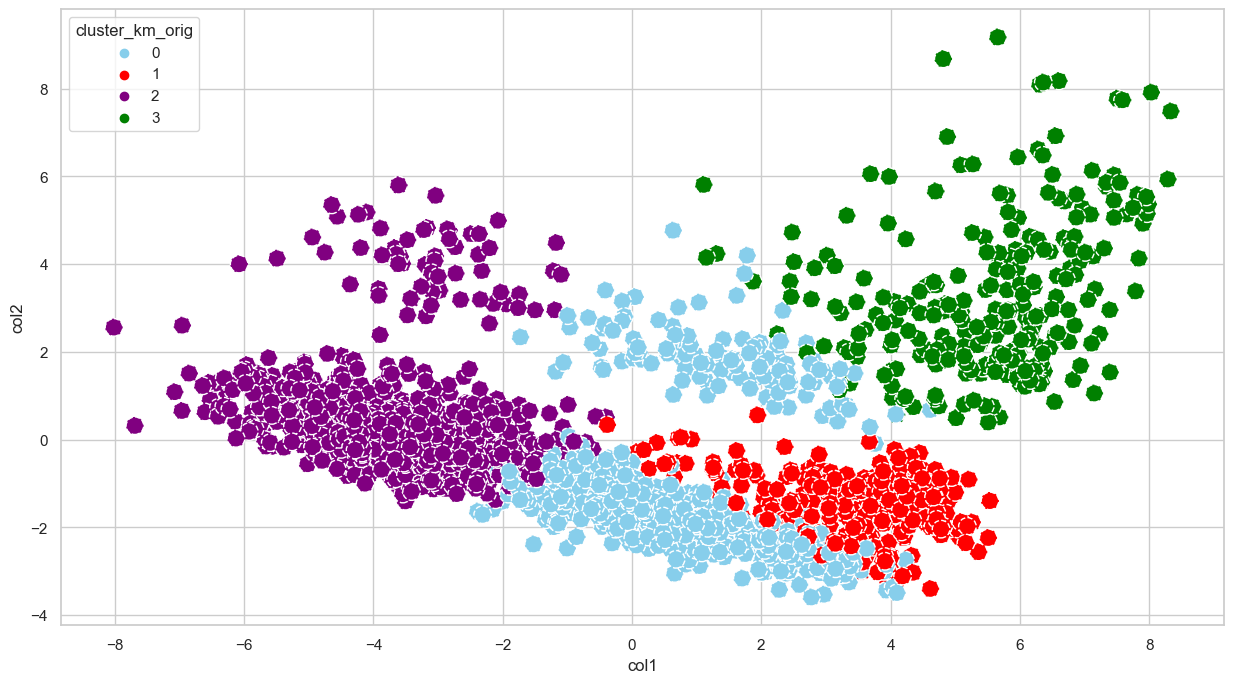

In [79]:
PCA_ds["cluster_km_orig"] = clus_df["cluster_km_orig"].copy()
# Visualize the results in 2D
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(
    x="col1", y="col2",
    hue="cluster_km_orig",
    linestyle='--',
    data=PCA_ds,
    palette=['skyblue','red','purple','green'],
    s=160,
    ax=ax
)

## **📌 K Means Clustering with Dimensionality Reduction**

In [80]:
PCA_ds.drop("cluster_km_orig", axis=1, inplace=True)
PCA_ds.head()

,col1,col2
0,4.170015,-1.607301
1,-4.347667,0.065995
2,3.331285,-1.537015
3,-3.964544,0.668761
4,0.608980,-1.441085


In [81]:
#Use PCA for Cluster
kMeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0) 
y_pred_kMeans = kMeans.fit_predict(PCA_ds)
PCA_ds["Cluster_KM_PCA"] = y_pred_kMeans
#Adding the Clusters feature to the orignal dataframe.
clus_df["Cluster_KM_PCA"] = y_pred_kMeans
df["cluster_KM_PCA"] = y_pred_kMeans

<Axes: xlabel='col1', ylabel='col2'>

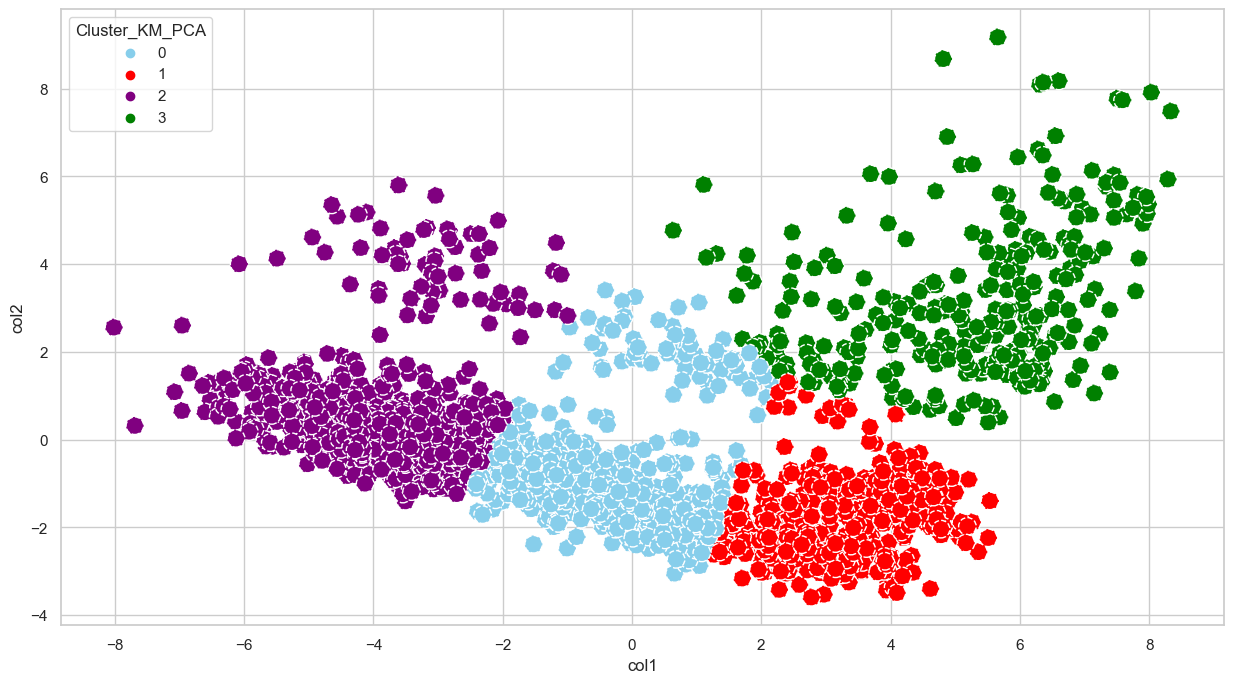

In [82]:
# Visualize the results in 2D
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(
    x="col1", y="col2",
    hue="Cluster_KM_PCA",
    linestyle='--',
    data=PCA_ds,
    palette=['skyblue','red','purple','green'],
    s=160,
    ax=ax
)

## **📌 Clustering with RFM Analysis**

In [83]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df_rfm = pd.read_csv(source, sep=";")
df_rfm.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [84]:
df_rfm['Spending']=df_rfm['MntWines']+ \
    df_rfm['MntFruits']+ \
    df_rfm['MntMeatProducts']+ \
    df_rfm['MntFishProducts']+ \
    df_rfm['MntSweetProducts']+ \
    df_rfm['MntGoldProds']

In [85]:
df_rfm['Total_Purchases'] = df_rfm['NumDealsPurchases'] + \
    df_rfm['NumWebPurchases'] + \
    df_rfm['NumCatalogPurchases'] + \
    df_rfm['NumStorePurchases']

In [86]:
df_rfm=df_rfm[['ID','Spending','Total_Purchases','Recency','Dt_Customer']]
df_rfm.head()

,ID,Spending,Total_Purchases,Recency,Dt_Customer
0,5524,1617,25,58,2012-09-04
1,2174,27,6,38,2014-03-08
2,4141,776,21,26,2013-08-21
3,6182,53,8,26,2014-02-10
4,5324,422,19,94,2014-01-19


### Recency calculation 

In [87]:
recency_df = df_rfm[['ID','Recency']]
recency_df.head()

,ID,Recency
0,5524,58
1,2174,38
2,4141,26
3,6182,26
4,5324,94


### Frequency calculation

In [88]:
frequency_df = df_rfm[['ID','Total_Purchases']]
temp_df = recency_df.merge(frequency_df,on='ID')
frequency_df.head()

,ID,Total_Purchases
0,5524,25
1,2174,6
2,4141,21
3,6182,8
4,5324,19


### Monetary calculation

In [89]:
monetary_df = df_rfm[['ID','Spending']]
monetary_df.head()

,ID,Spending
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


#### DataFrame aggregation

In [90]:
tx_user  = temp_df.merge(monetary_df,on='ID')
tx_user.columns = ['ID','Recency','Frequency','Monetary']
tx_user.head()

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


#### Elbow method

In [91]:
# !pip install scikit-learn-extra

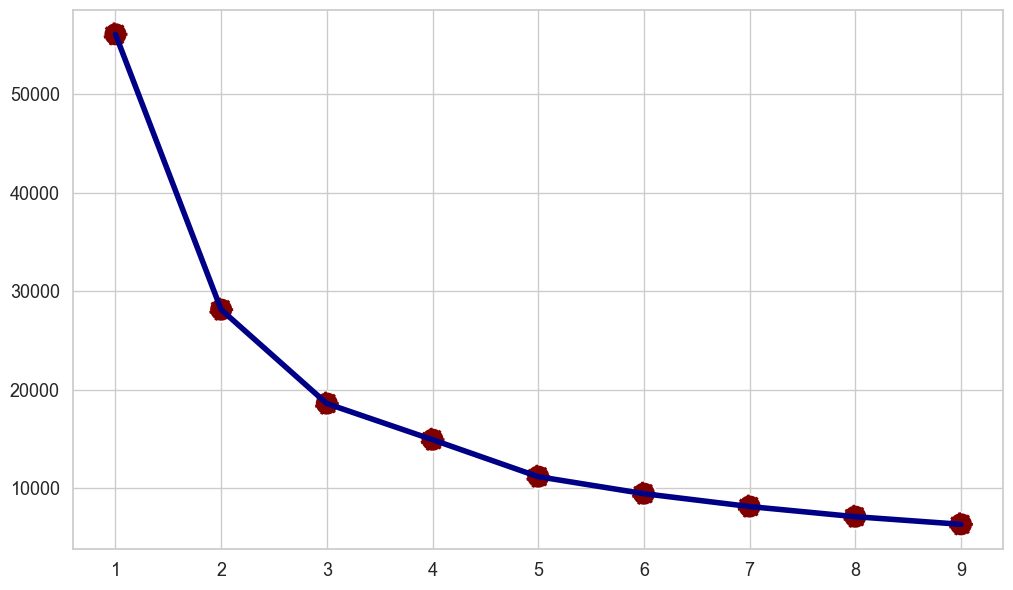

In [92]:
from sklearn_extra.cluster import KMedoids
sse=[]
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmedoids = KMedoids(n_clusters=k, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(tx_recency)
    tx_recency["clusters"] = kmedoids.labels_
    sse.append(kmedoids.inertia_)

plt.figure(figsize=(12, 7))

sns.lineplot(x=range(1, 10), y=sse, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 10), y=sse, s=300, color='#800000',  linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

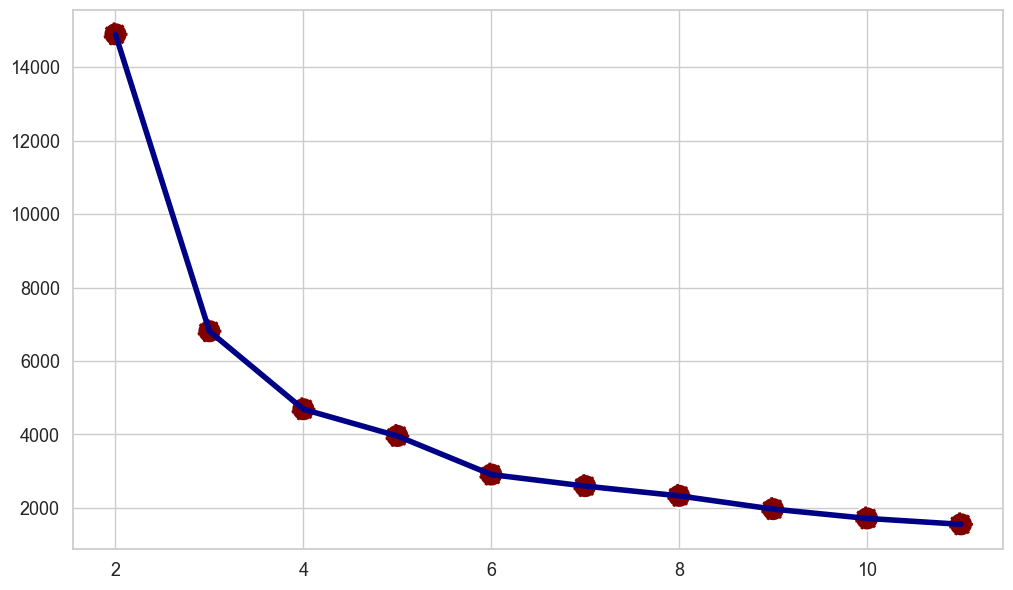

In [93]:
sse=[]
tx_frequencyn = tx_user[['Frequency']]
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(tx_frequencyn)
    tx_frequencyn["clusters"] = kmedoids.labels_
    sse.append(kmedoids.inertia_)

plt.figure(figsize=(12, 7))

sns.lineplot(x=range(2, 12), y=sse, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 12), y=sse, s=300, color='#800000',  linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [94]:
sse

[14897.0,
 6810.0,
 4685.416647527177,
 3957.478923277582,
 2906.524758424985,
 2592.0,
 2326.219806739988,
 1965.0,
 1711.936074863071,
 1551.0]

In this analysis we will divide our customers in 5 clusters for each RFM metrics leading to 5x5x5 clusters

#### Silhouette Score 

In [95]:
from sklearn.metrics import silhouette_score

scori = [] 
for n_clusters in range(2,11):
    clusterer = KMedoids(n_clusters=n_clusters,init='k-medoids++',max_iter=1000, random_state=0,metric='euclidean').fit(tx_recency)
    preds = clusterer.predict(tx_recency)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(tx_recency, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))
    scori.append(score)

For n_clusters = 2. The average silhouette_score is : 0.6155963489463859
For n_clusters = 3. The average silhouette_score is : 0.5804657109222813
For n_clusters = 4. The average silhouette_score is : 0.5406501940694517
For n_clusters = 5. The average silhouette_score is : 0.5549262881715225
For n_clusters = 6. The average silhouette_score is : 0.5308970710220793
For n_clusters = 7. The average silhouette_score is : 0.5430612257484964
For n_clusters = 8. The average silhouette_score is : 0.581571789767682
For n_clusters = 9. The average silhouette_score is : 0.6136036343163145
For n_clusters = 10. The average silhouette_score is : 0.6027214123302402


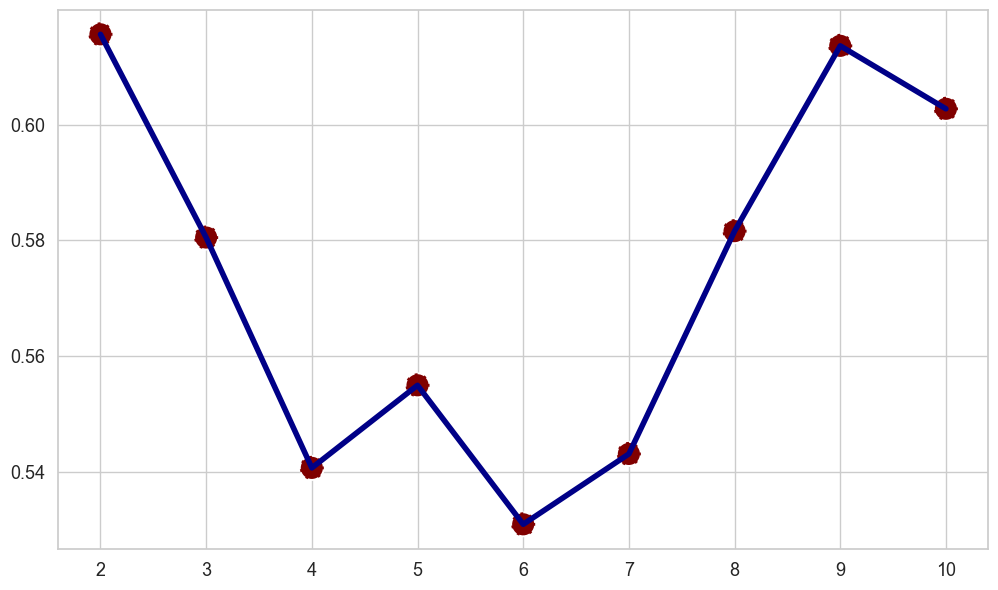

In [96]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x=range(2,11), y=scori, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=scori, s=300, color='#800000',  linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [97]:
scori = [] 
for n_clusters in range(2,11):
    clusterer = KMedoids(n_clusters=n_clusters,init='k-medoids++',max_iter=1000, random_state=0,metric='euclidean').fit(tx_frequencyn)
    preds = clusterer.predict(tx_frequencyn)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(tx_frequencyn, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))
    scori.append(score)

For n_clusters = 2. The average silhouette_score is : 0.6003925542550852
For n_clusters = 3. The average silhouette_score is : 0.4992074431261966
For n_clusters = 4. The average silhouette_score is : 0.5244472589468098
For n_clusters = 5. The average silhouette_score is : 0.550712077818694
For n_clusters = 6. The average silhouette_score is : 0.6946384048458986
For n_clusters = 7. The average silhouette_score is : 0.7174392074812316
For n_clusters = 8. The average silhouette_score is : 0.7436002278096049
For n_clusters = 9. The average silhouette_score is : 0.7479607881370979
For n_clusters = 10. The average silhouette_score is : 0.7548635840472292


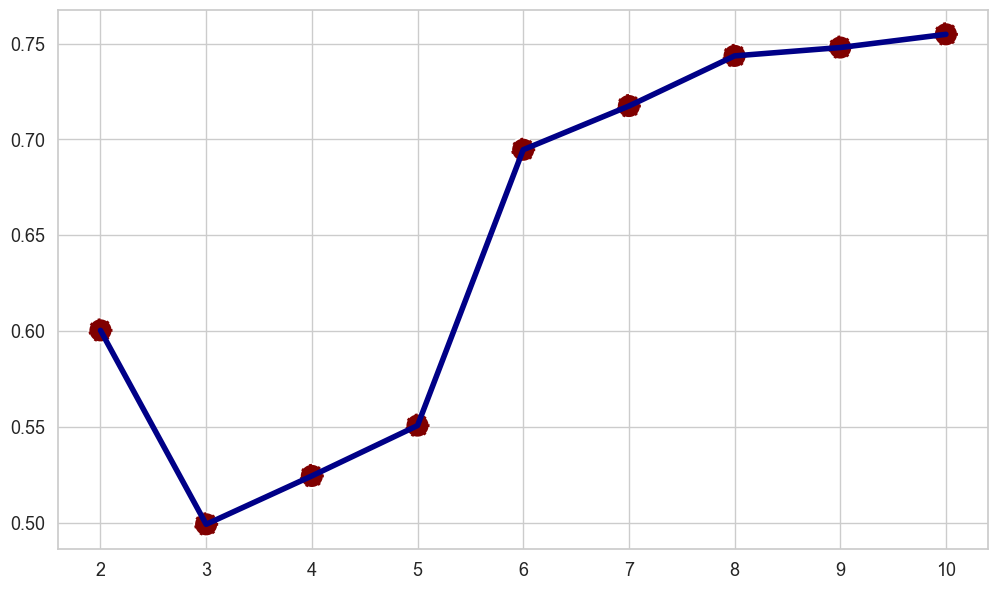

In [98]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x=range(2,11), y=scori, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=scori, s=300, color='#800000',  linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Recency clusters creation

In [99]:
#tx_recency = tx_user[['Recency']]

kmedoids = KMedoids(n_clusters=5, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(tx_recency)
tx_user['RecencyCluster'] = kmedoids.predict(tx_recency)

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)
#see details of each cluster
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,392.000000,90.418367,5.137841,82.000000,86.000000,91.000000,95.000000,99.000000
1,430.000000,72.153488,5.593009,63.000000,67.000000,72.000000,77.000000,81.000000
2,472.000000,52.027542,5.706301,42.000000,47.750000,52.000000,56.000000,62.000000
3,490.000000,30.240816,6.173296,20.000000,25.000000,30.000000,36.000000,41.000000
4,456.000000,9.122807,5.849227,0.000000,4.000000,9.000000,14.000000,19.000000


#### Frequency clusters creation

In [100]:
tx_frequency = tx_user[['Frequency']]

kmedoids = KMedoids(n_clusters=5, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(tx_frequency)
tx_user['FrequencyCluster'] = kmedoids.predict(tx_frequency)

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,832.000000,6.608173,2.012077,0.000000,5.000000,7.000000,8.000000,10.000000
1,310.000000,12.996774,1.493239,11.000000,12.000000,13.000000,14.000000,15.000000
2,491.000000,17.940937,1.425201,16.000000,17.000000,18.000000,19.000000,20.000000
3,400.000000,22.770000,1.398925,21.000000,22.000000,23.000000,24.000000,25.000000
4,207.000000,28.246377,2.808132,26.000000,26.000000,27.000000,29.000000,44.000000


#### Monetary clusters creation

In [101]:
tx_monetary = tx_user[['Monetary']]

kmedoids = KMedoids(n_clusters=5, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(tx_monetary)
tx_user['MonetaryCluster'] = kmedoids.predict(tx_monetary)

#order the cluster numbers
tx_user = order_cluster('MonetaryCluster', 'Monetary',tx_user,True)

#show details of the dataframe
tx_user.groupby('MonetaryCluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,939.000000,74.423855,53.566384,5.000000,36.000000,57.000000,97.500000,231.000000
1,398.000000,407.756281,110.683876,232.000000,311.000000,406.000000,493.750000,615.000000
2,314.000000,828.961783,113.620066,622.000000,731.000000,832.500000,928.000000,1009.000000
3,315.000000,1208.228571,122.867096,1012.000000,1102.500000,1189.000000,1315.000000,1445.000000
4,274.000000,1766.171533,243.027162,1449.000000,1574.000000,1701.500000,1919.000000,2525.000000


### Segment creation

In [102]:
segt_map = {
    r'30': 'Promising',
    r'23': 'Loyal customers',
    r'24': 'Loyal customers',
    r'33': 'Loyal customers',
    r'34': 'Loyal customers',
    r'43': 'Loyal customers',
    r'32': 'Potential loyalist',
    r'31': 'Potential loyalist',
    r'42': 'Potential loyalist',
    r'41': 'Potential loyalist',
    r'21': 'Need attention',
    r'22': 'Need attention',
    r'12': 'Need attention',
    r'11': 'Need attention',
    r'40': 'New customers',
    r'20': 'About to sleep',
    r'14': 'Cant loose them',
    r'04': 'Cant loose them',
    r'10': 'Lost',
    r'00': 'Lost',
    r'01': 'Lost',
    r'02': 'At risk',
    r'03': 'At risk',
    r'13': 'At risk',
    r'44': 'Champions',
}

tx_user['Segment'] = tx_user['RecencyCluster'].map(str) + tx_user['FrequencyCluster'].map(str)
tx_user['Segment'] = tx_user['Segment'].replace(segt_map, regex=True)
tx_user.sample(10)

,ID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,Segment
574,5519,8,20,797,4,2,2,Potential loyalist
2202,8779,13,12,172,4,1,0,Potential loyalist
576,1371,72,16,984,1,2,2,Need attention
2225,4136,63,11,119,1,1,0,Need attention
1736,803,82,4,21,0,0,0,Lost
48,3262,31,25,1655,3,3,4,Loyal customers
1064,295,77,22,1157,1,3,3,At risk
211,7451,23,19,2008,3,2,4,Potential loyalist
1531,4472,34,6,57,3,0,0,Promising
642,3033,56,11,318,2,1,1,Need attention


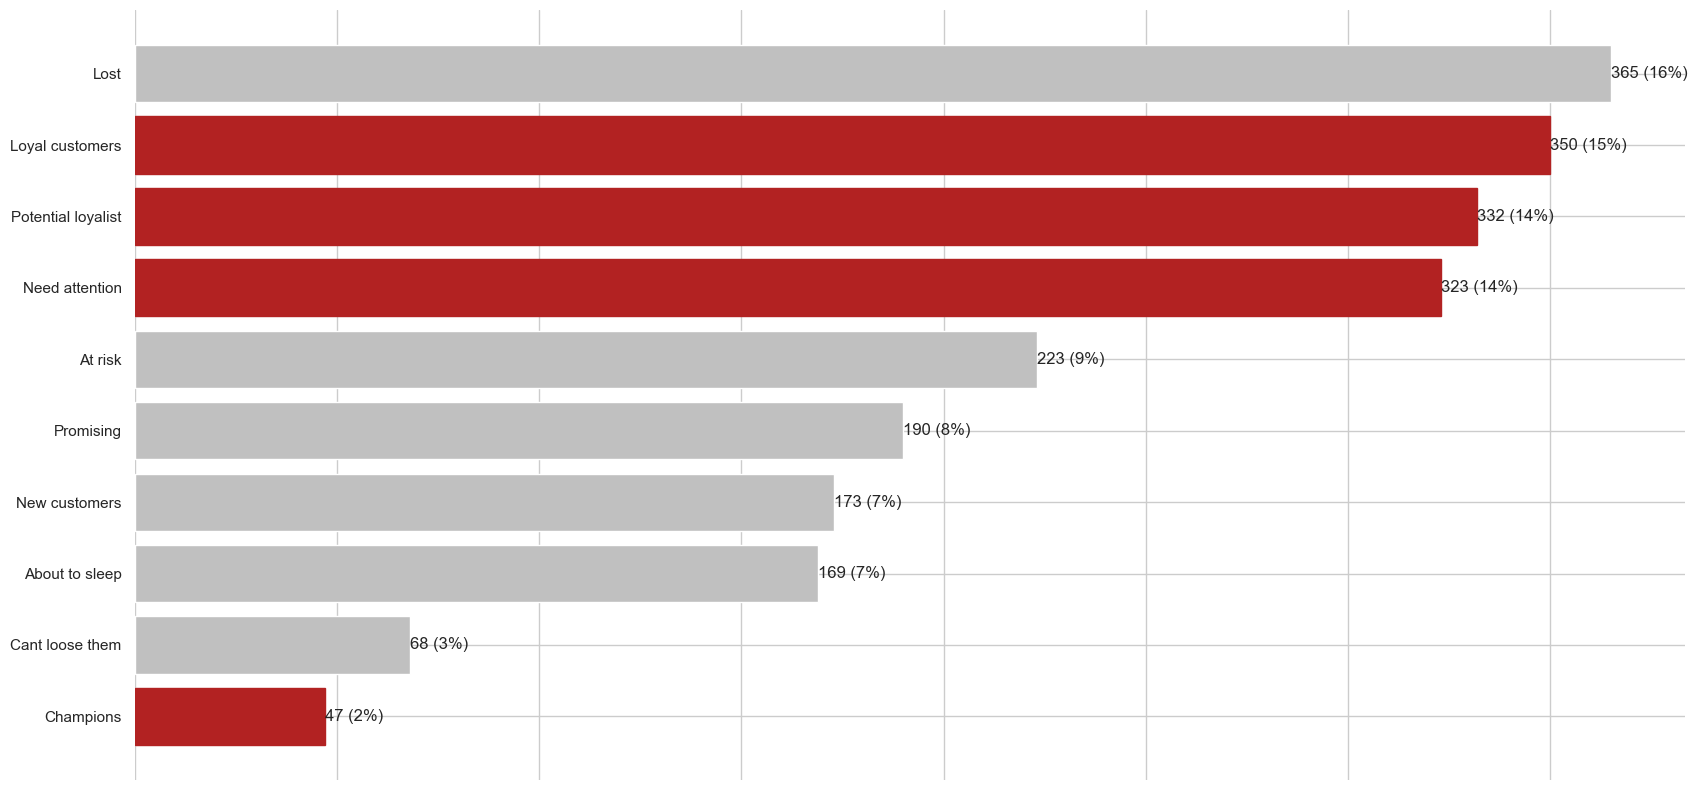

In [103]:
# count the number of customers in each segment
segments_counts = tx_user['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(20, 10))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Champions', 'Loyal customers', 'Potential loyalist', 'Need attention']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Metrics analysis per segment 

In [104]:
# Calculate average values for each RFM segment, and return a size of each segment 
tx_user_viz = tx_user.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
}).round(1)
# Print the aggregated dataset
tx_user_viz

Recency Frequency    Monetary      
                        mean      mean        mean count
Segment                                                 
About to sleep     51.500000  6.600000   72.100000   169
At risk            84.800000 21.100000 1077.500000   223
Cant loose them    81.200000 28.400000 1230.500000    68
Champions           9.200000 27.800000 1039.100000    47
Lost               82.800000  7.800000  134.200000   365
Loyal customers    35.300000 24.200000 1136.500000   350
Need attention     62.000000 16.000000  773.000000   323
New customers       9.500000  6.500000   64.400000   173
Potential loyalist 19.200000 16.100000  758.000000   332
Promising          30.600000  6.700000   67.200000   190

In [105]:
newr= tx_user_viz['Recency']['mean'].apply(lambda x: 'medium' if x>=np.quantile(tx_user_viz['Recency']['mean'], .25) and 
                                           x<=np.quantile(tx_user_viz['Recency']['mean'], .75) else 'high' if x>np.quantile(tx_user_viz['Recency']['mean'], .75) else 'low')
newf= tx_user_viz['Frequency']['mean'].apply(lambda x:'medium' if x>=np.quantile(tx_user_viz['Frequency']['mean'], .25) and 
                                             x<=np.quantile(tx_user_viz['Frequency']['mean'], .75) else 'high' if x>np.quantile(tx_user_viz['Frequency']['mean'], .75) else 'low')
newm= tx_user_viz['Monetary']['mean'].apply(lambda x:'medium' if x>=np.quantile(tx_user_viz['Monetary']['mean'], .25) and 
                                             x<=np.quantile(tx_user_viz['Monetary']['mean'], .75) else 'high' if x>np.quantile(tx_user_viz['Monetary']['mean'], .75) else 'low')
new_tx_user=pd.DataFrame([newr,newf,newm],index=['Recency','Frequency','Monetary'])
new_tx_user.T

,Recency,Frequency,Monetary
Segment,,,
About to sleep,medium,low,low
At risk,high,medium,high
Cant loose them,high,high,high
Champions,low,high,medium
Lost,high,medium,medium
Loyal customers,medium,high,high
Need attention,medium,medium,medium
New customers,low,low,low
Potential loyalist,low,medium,medium


In [106]:
tx_user.groupby(['Segment'])[['Recency']].agg(['min', 'max', 'count'])

Recency          
                       min max count
Segment                             
About to sleep          42  62   169
At risk                 63  99   223
Cant loose them         63  99    68
Champions                0  19    47
Lost                    63  99   365
Loyal customers          0  62   350
Need attention          42  81   323
New customers            0  19   173
Potential loyalist       0  41   332
Promising               20  41   190

In [107]:
tx_user.groupby(['Segment'])[['Frequency']].agg(['min', 'max', 'count'])

Frequency          
                         min max count
Segment                               
About to sleep             0  10   169
At risk                   16  25   223
Cant loose them           26  39    68
Champions                 26  35    47
Lost                       0  15   365
Loyal customers           21  44   350
Need attention            11  20   323
New customers              1  10   173
Potential loyalist        11  20   332
Promising                  0  10   190

In [108]:
tx_user.groupby(['Segment'])[['Monetary']].agg(['min', 'max', 'count'])

Monetary            
                        min   max count
Segment                                
About to sleep            5  1679   169
At risk                 211  2440   223
Cant loose them         653  2074    68
Champions               277  1833    47
Lost                      6  1685   365
Loyal customers         359  2524   350
Need attention            8  2302   323
New customers             8   373   173
Potential loyalist        9  2525   332
Promising                 6   711   190

In [109]:
#Adding the Clusters feature to the orignal dataframe.
dft  = df.merge(tx_user[['ID', 'Segment']],on='ID')
dft.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response,Divorced,Married,Single,cluster_KM_orig,cluster_KM_PCA,Segment
0,5524,0.303571,1,0.351086,0,0,2012-09-04,0.585859,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,1.726261,-0.418298,0.350000,0,0,0,0,0,0,3,11,0.696429,2,0,0,0.914286,1.315785,1.477134,1.116046,0.568182,0,0,-0.510313,1,0.322257,0.727273,2,1,0.000000,0.000000,1.000000,1,1,Loyal customers
1,2174,0.250000,1,0.277680,1,1,2014-03-08,0.383838,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,-0.374162,-1.419908,0.250000,0,0,0,0,0,0,3,11,0.750000,2,1,2,0.057143,-1.442462,-1.409056,-1.363875,0.136364,0,0,-0.510313,1,-0.859340,0.181818,3,0,0.000000,0.000000,1.000000,2,2,Promising
2,4141,0.446429,1,0.434956,0,0,2013-08-21,0.262626,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,0.158930,1.242818,0.200000,0,0,0,0,0,0,3,11,0.553571,2,0,0,0.542857,0.660253,0.740554,0.671920,0.477273,0,0,-0.510313,2,0.729193,0.636364,3,0,0.000000,1.000000,0.000000,1,1,Loyal customers
3,6182,0.785714,1,0.155079,1,0,2014-02-10,0.262626,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,-1.338023,-0.418298,0.300000,0,0,0,0,0,0,3,11,0.214286,0,1,1,0.028571,-1.118746,-0.650506,-1.340485,0.181818,0,0,-0.510313,0,-0.753151,0.090909,3,0,0.000000,1.000000,0.000000,2,2,Promising
4,5324,0.732143,3,0.352051,1,0,2014-01-19,0.949495,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,0.524042,0.272951,0.250000,0,0,0,0,0,0,3,11,0.267857,1,1,1,0.000000,0.177763,0.515865,0.035887,0.431818,0,0,-0.510313,1,0.389599,0.000000,0,0,0.000000,1.000000,0.000000,0,0,At risk


#### Segment visualization

In [110]:
# !pip install squarify

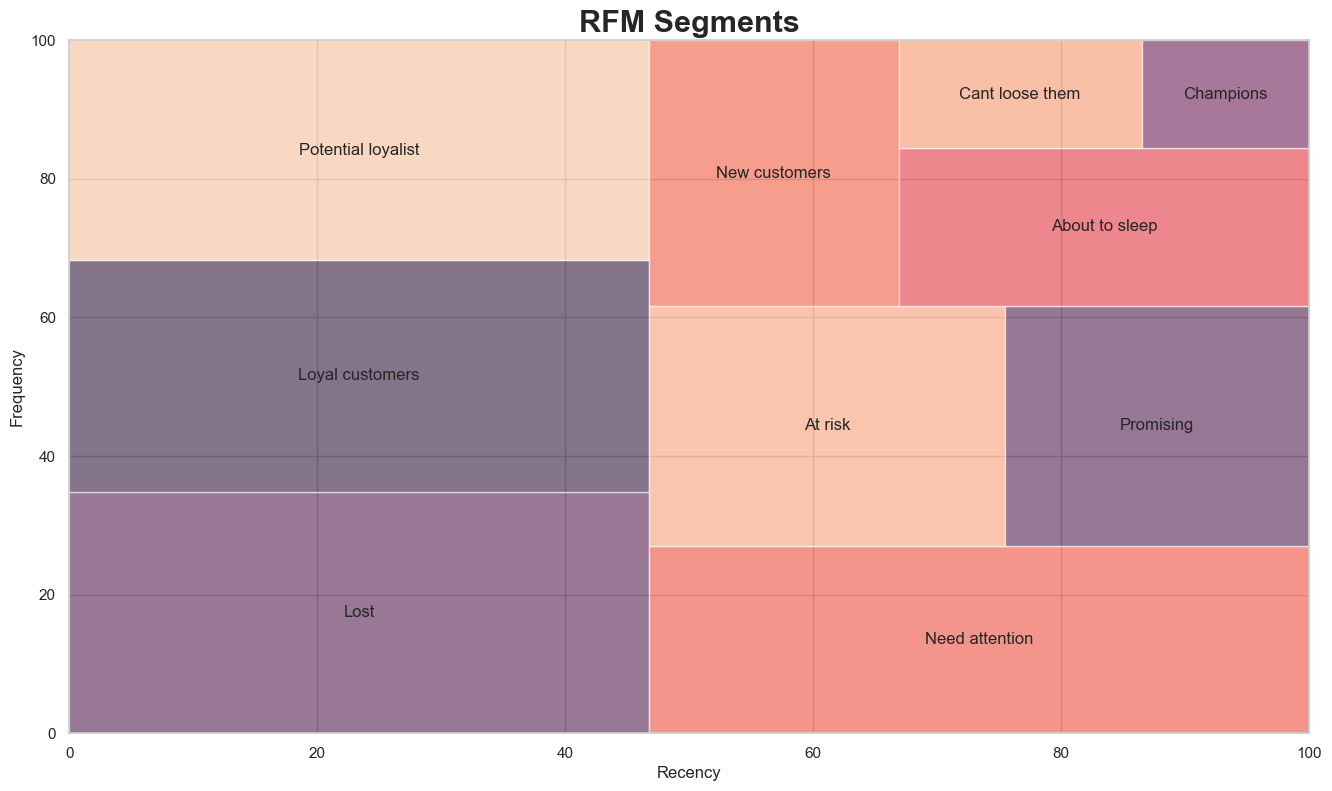

In [111]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=tx_user['Segment'].value_counts(),
              label=tx_user['Segment'].value_counts().index, alpha=.6 )
plt.title("RFM Segments",fontsize=22,fontweight="bold")
ax.set_xlabel('Recency',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.axis('on')
plt.show()

## **📌 Evaluation Model**

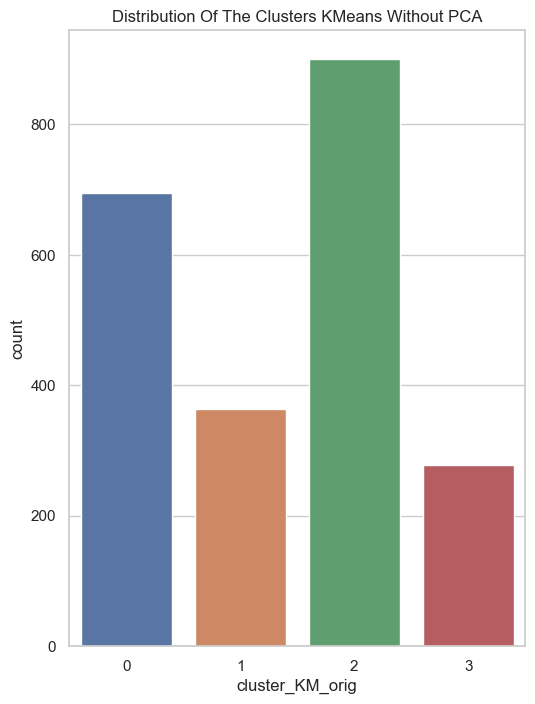

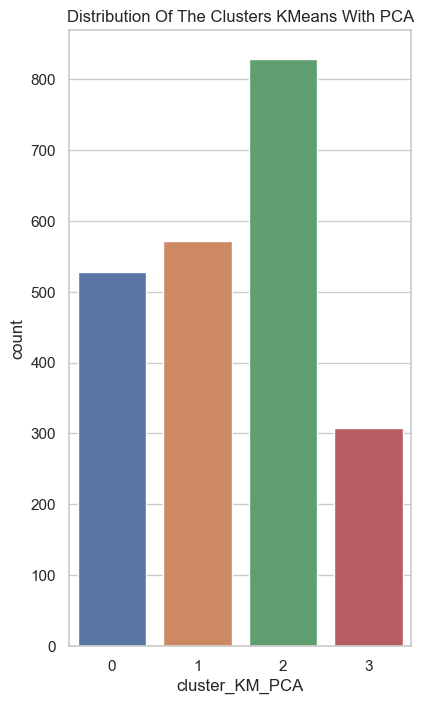

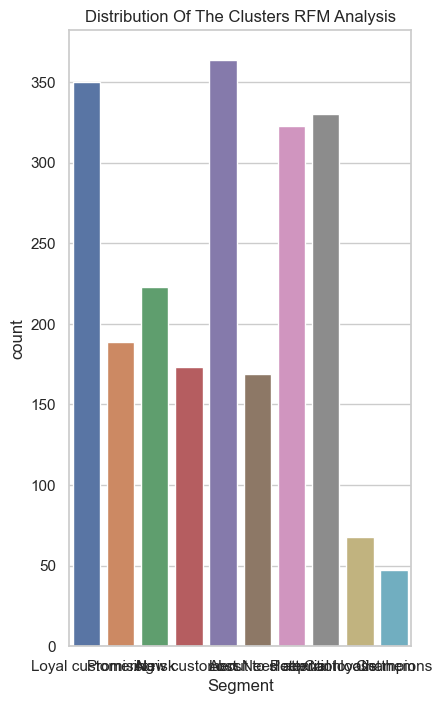

In [112]:
#Plotting countplot of clusters
plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
plo = sns.countplot(x=dft["cluster_KM_orig"])
plo.set_title("Distribution Of The Clusters KMeans Without PCA")
plt.show()

plt.subplot(1,3,2)
plp = sns.countplot(x=dft["cluster_KM_PCA"])
plp.set_title("Distribution Of The Clusters KMeans With PCA")
plt.show()

plt.subplot(1,3,3)
plr = sns.countplot(x=dft["Segment"])
plr.set_title("Distribution Of The Clusters RFM Analysis")
plt.show()

#### Silhouette Plot

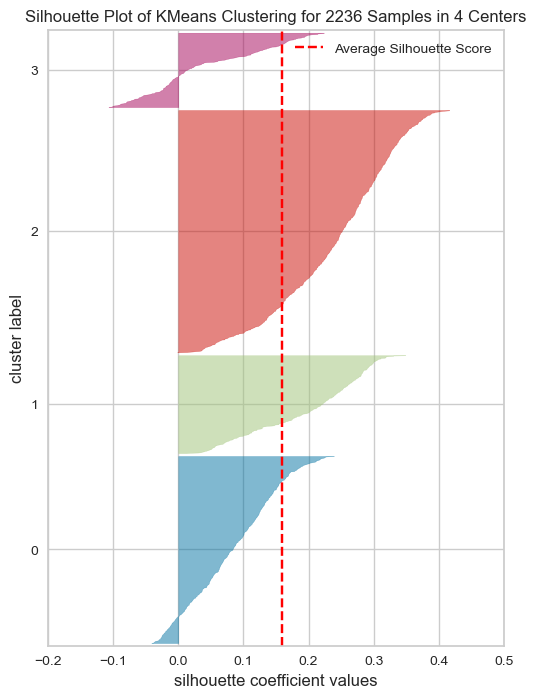

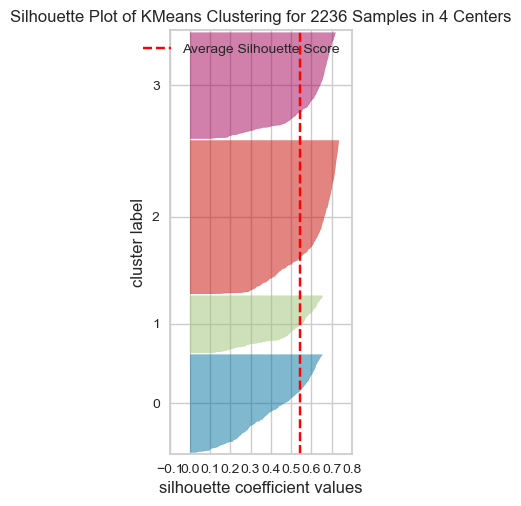

In [113]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=[20,8])

#silhoutte plot Kmeans without PCA
plt.subplot(1,3,1)
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(clus_dfsc)
visualizer.show()
plt.show()

#silhoutte plot Kmeans with PCA
plt.subplot(1,3,2)
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(PCA_ds)
visualizer.show()
plt.show()

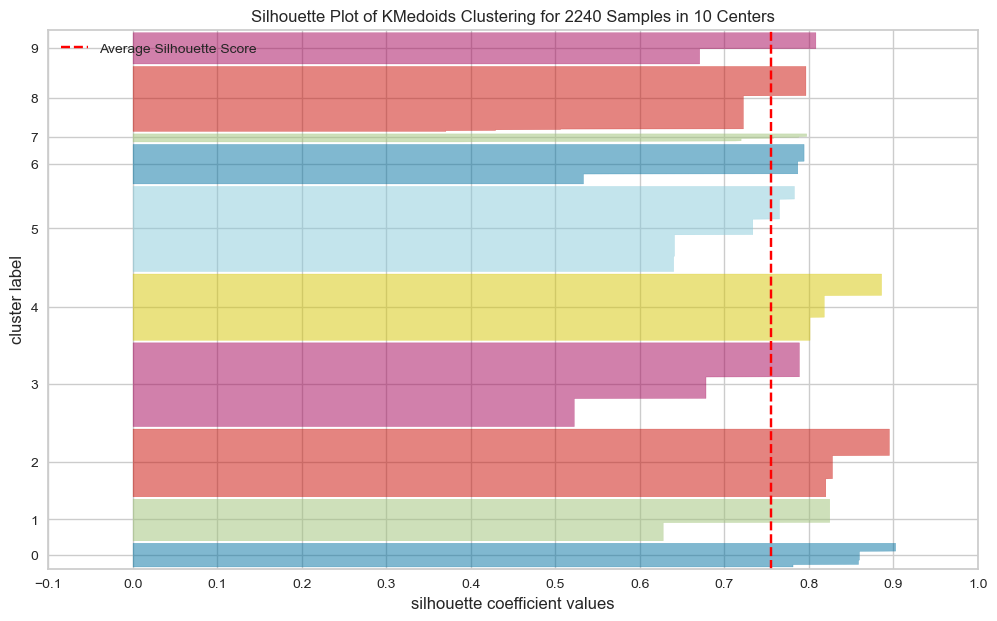

In [114]:
plt.figure(figsize=[12,7])

model = KMedoids(n_clusters=10, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(tx_frequencyn)
visualizer.show()
plt.show()

#### Interpretasi Hasil

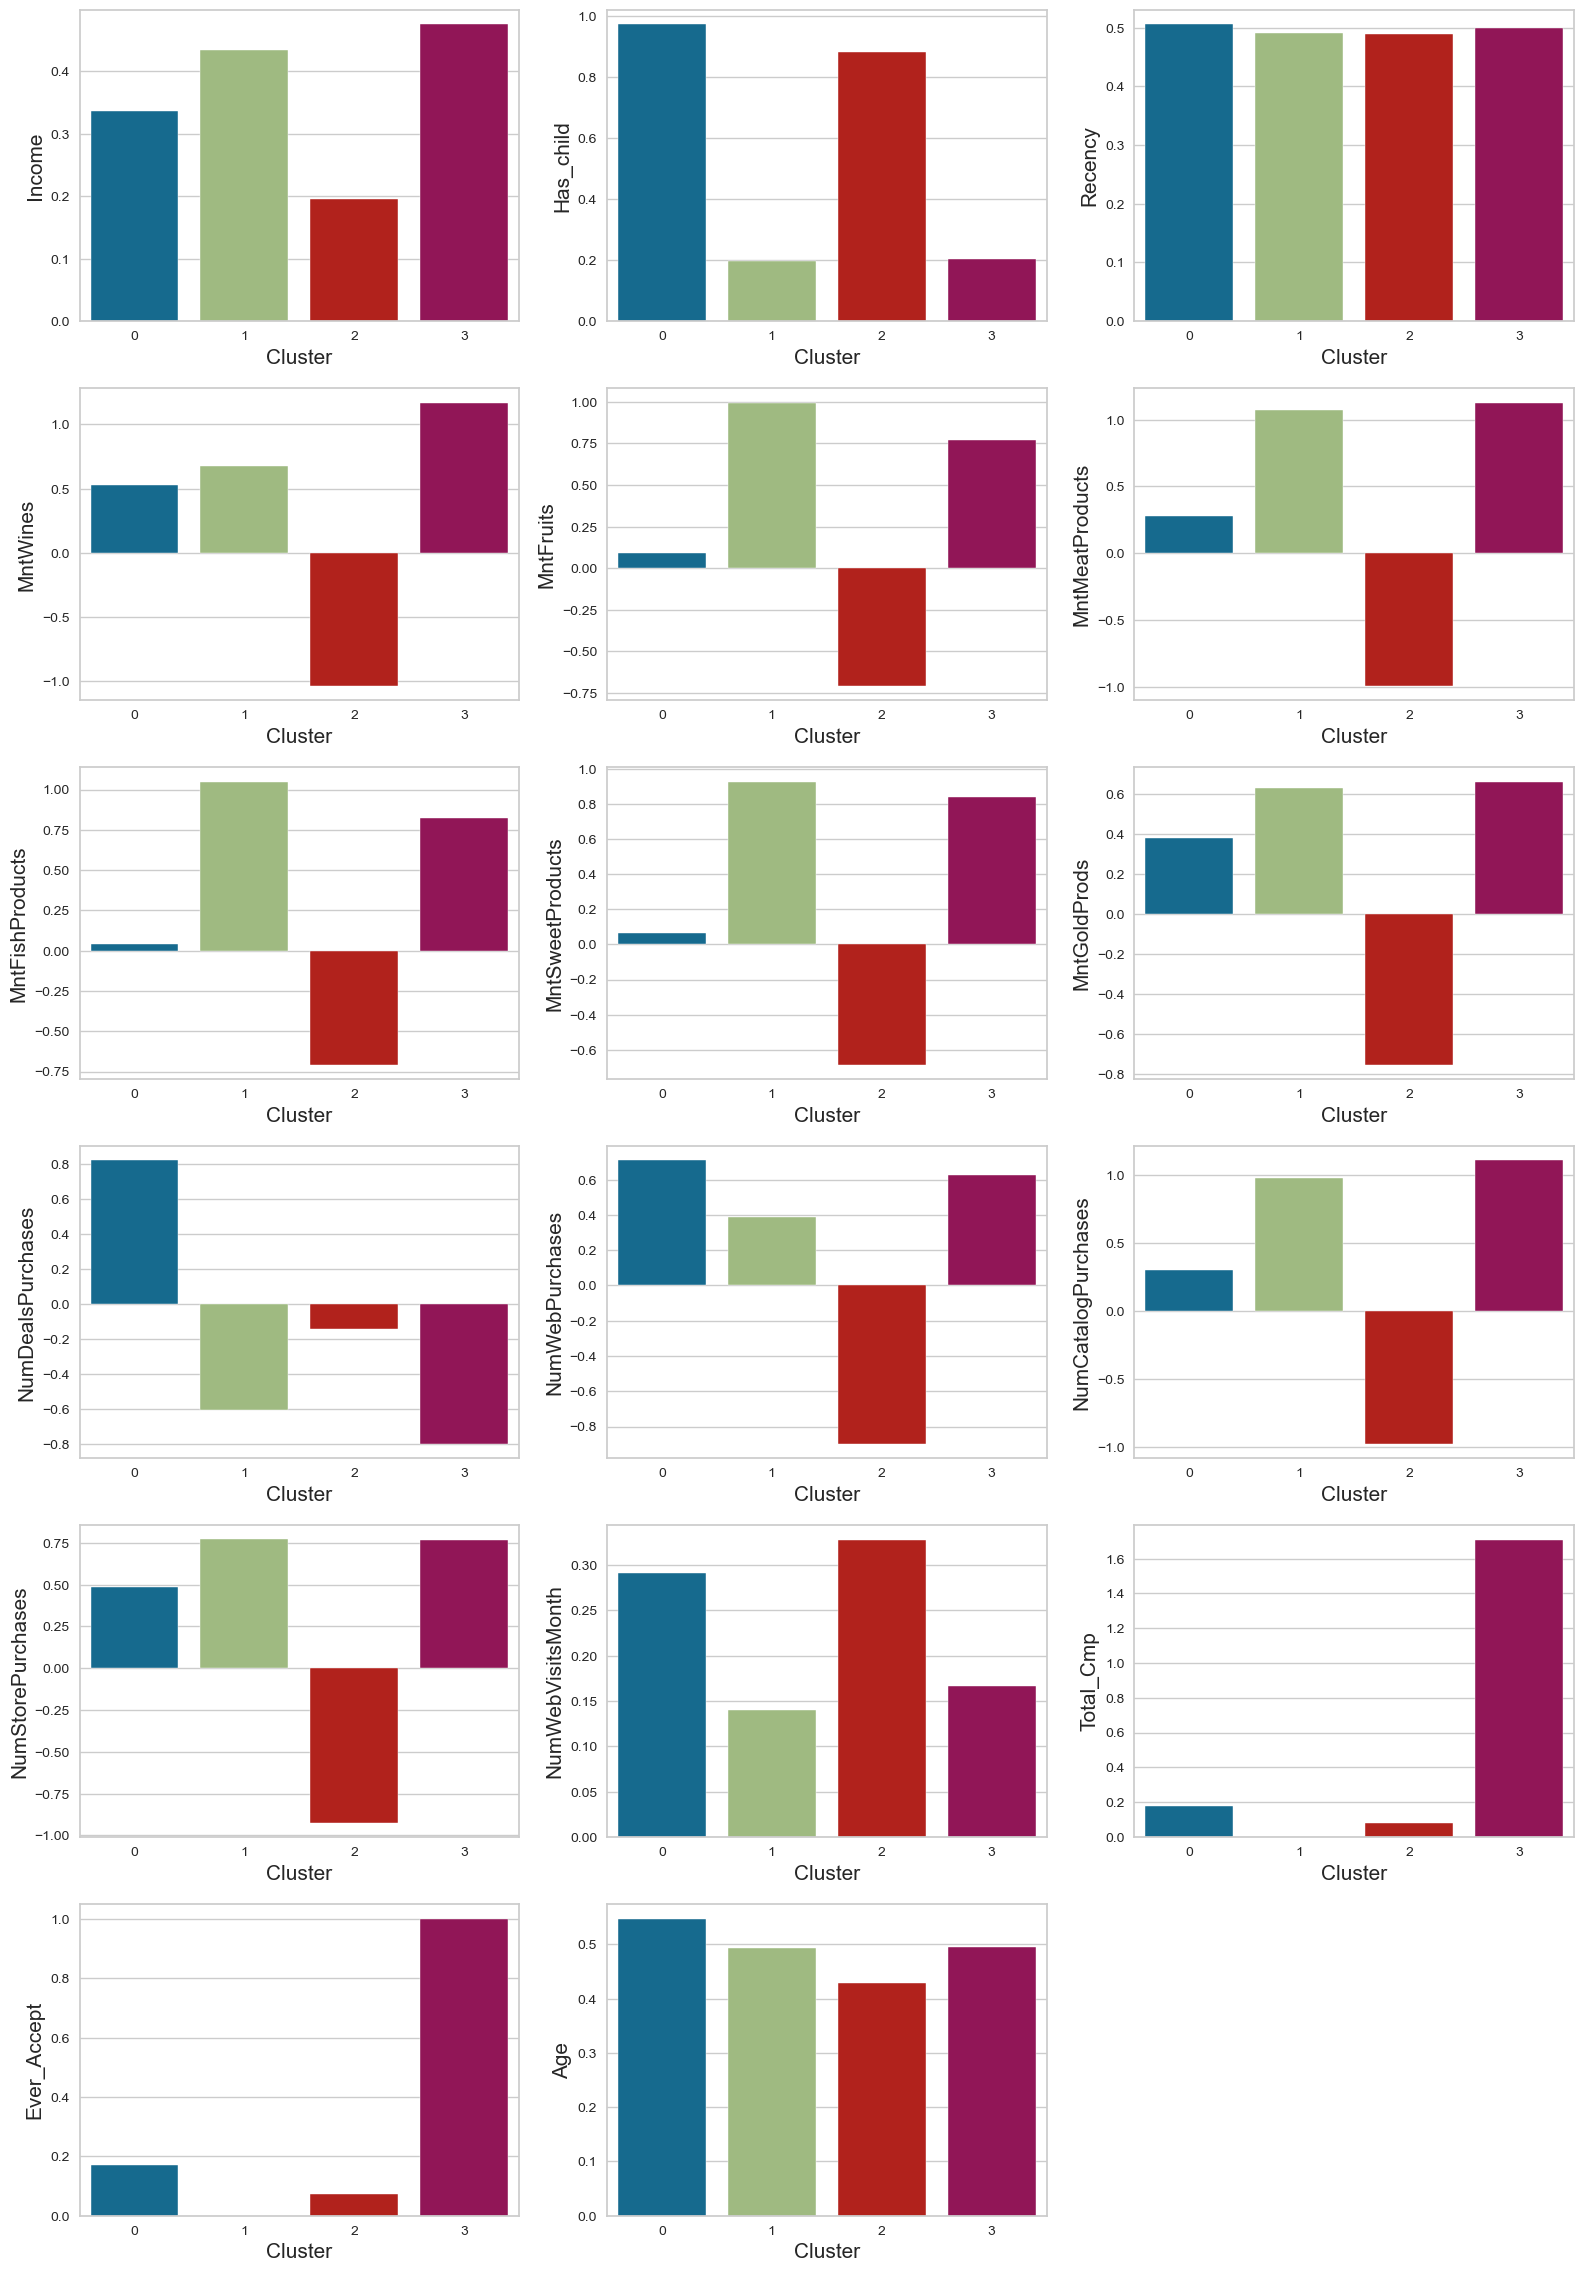

In [115]:
# Visualization KMeans WIthout PCA
newdf = pd.DataFrame(data= df, columns=['Income', 'Has_child', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Cmp', 'Ever_Accept',
                  'Age'])
hasilcl2 = dft[['ID', 'cluster_KM_orig', 'Income', 'Has_child', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Cmp', 'Ever_Accept',
                  'Age']].copy()
analysis_res = hasilcl2.groupby('cluster_KM_orig').agg({'mean'})
analysis_res['Banyak_cust'] = hasilcl2.groupby('cluster_KM_orig')['ID'].count()

plt.figure(figsize=(16, 30))
for i, var in enumerate(newdf.columns):
    plt.subplot(8,3,i+1)
    sns.barplot(x = analysis_res.reset_index().cluster_KM_orig, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()

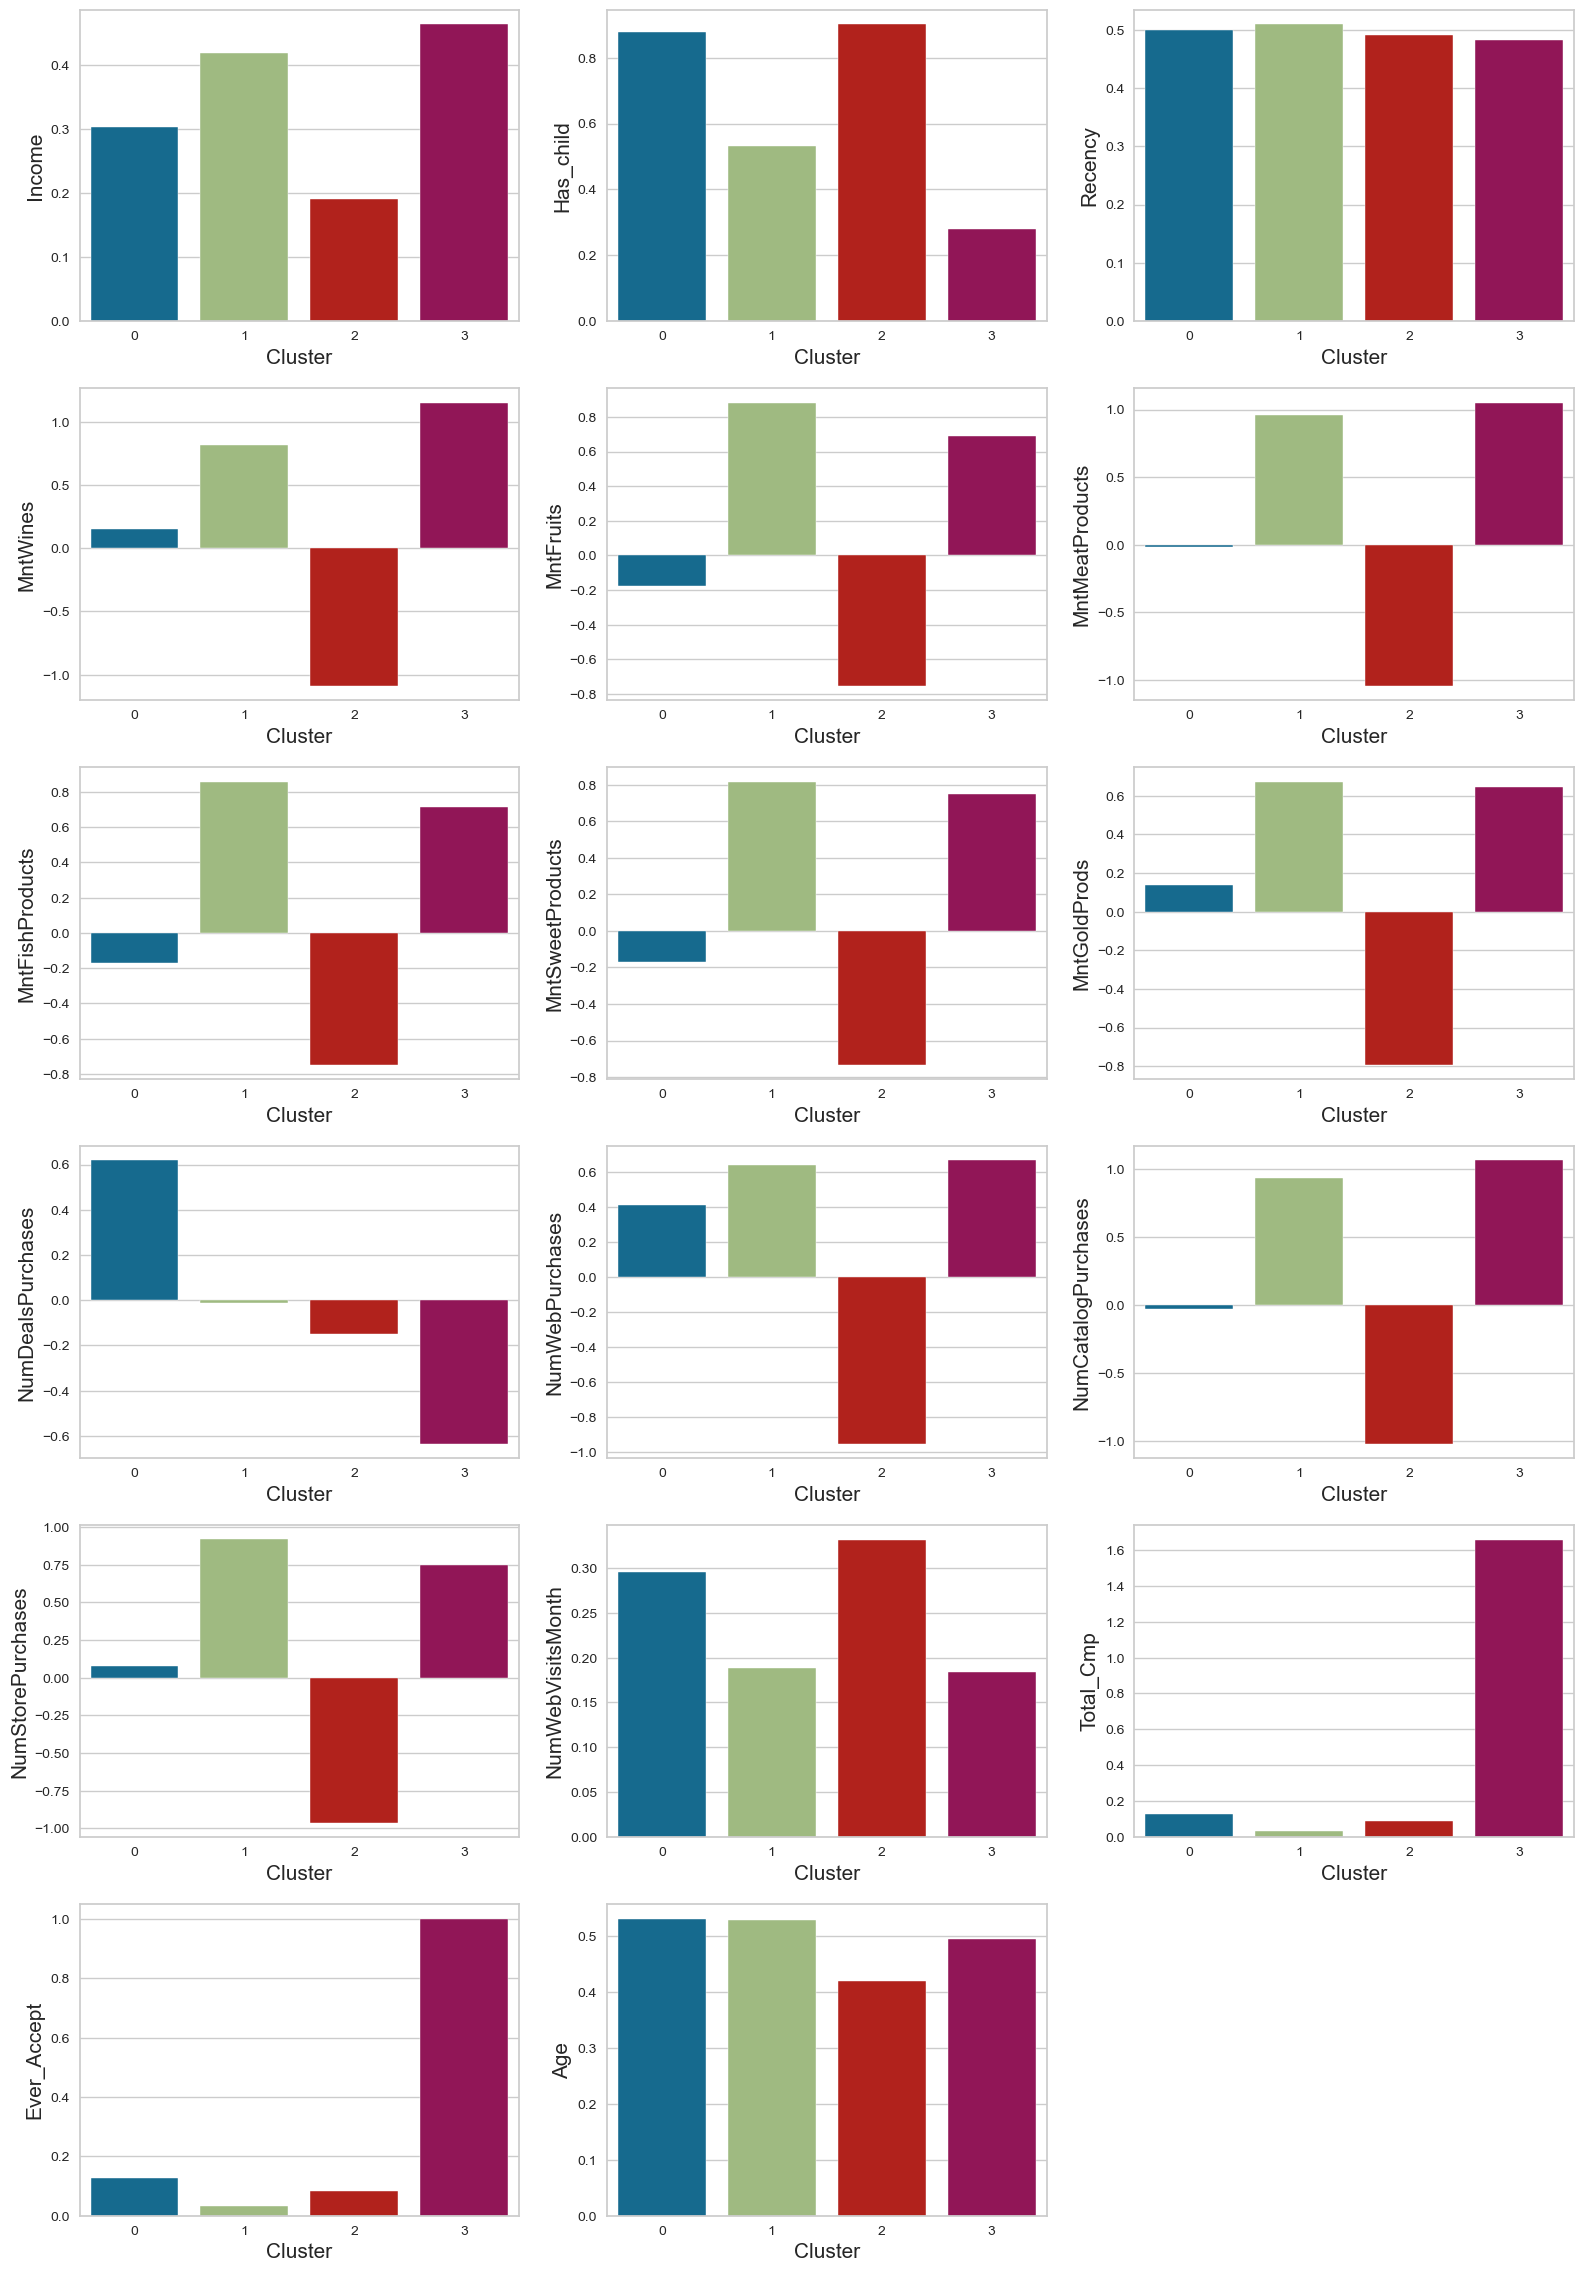

In [116]:
# Visualization KMeans With PCA
newdf = pd.DataFrame(data= df, columns=['Income', 'Has_child', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Cmp', 'Ever_Accept',
                  'Age'])
hasilcl2 = dft[['ID', 'cluster_KM_PCA', 'Income', 'Has_child', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Cmp', 'Ever_Accept',
                  'Age']].copy()
analysis_res = hasilcl2.groupby('cluster_KM_PCA').agg({'mean'})
analysis_res['Banyak_cust'] = hasilcl2.groupby('cluster_KM_PCA')['ID'].count()

plt.figure(figsize=(16, 30))
for i, var in enumerate(newdf.columns):
    plt.subplot(8,3,i+1)
    sns.barplot(x = analysis_res.reset_index().cluster_KM_PCA, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()

In [117]:
dft.groupby('cluster_KM_orig')[['Income', 'Has_child', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Cmp', 'Ever_Accept',
                  'Age']].agg(['mean', 'median', 'std'])

Income                   Has_child                    \
                    mean   median      std      mean   median      std   
cluster_KM_orig                                                          
0               0.336259 0.339292 0.074334  0.972662 1.000000 0.163184   
1               0.434842 0.437781 0.082419  0.197802 0.000000 0.398890   
2               0.195258 0.195743 0.087396  0.883333 1.000000 0.321201   
3               0.475187 0.482451 0.070738  0.202166 0.000000 0.402342   

                 Recency                    MntWines                     \
                    mean   median      std      mean    median      std   
cluster_KM_orig                                                           
0               0.505705 0.515152 0.291197  0.524217  0.526952 0.536487   
1               0.490287 0.500000 0.293862  0.675452  0.731319 0.507019   
2               0.489798 0.484848 0.292444 -1.038104 -1.074235 0.455571   
3               0.500310 0.535354 0.294994  1.170031  1.250000 0.426467   

                MntFruits                    MntMeatProducts            \
                     mean    median      std            mean    median   
cluster_KM_orig                                                          
0                0.088927  0.181439 0.886528        0.275164  0.271203   
1                0.995899  1.169098 0.703445        1.070267  1.162742   
2               -0.708270 -0.715420 0.613019       -0.992129 -1.003333   
3                0.769428  0.847349 0.832130        1.126713  1.233219   

                         MntFishProducts                    MntSweetProducts  \
                     std            mean    median      std             mean   
cluster_KM_orig                                                                
0               0.493376        0.038655  0.128866 0.867842         0.067297   
1               0.493519        1.049637  1.149277 0.591788         0.929886   
2               0.475376       -0.708485 -0.700799 0.612292        -0.686885   
3               0.497779        0.825643  0.989486 0.864970         0.840962   

                                   MntGoldProds                     \
                   median      std         mean    median      std   
cluster_KM_orig                                                      
0                0.178454 0.900907     0.378713  0.366546 0.825381   
1                1.104422 0.763638     0.633108  0.651953 0.830595   
2               -0.705164 0.612125    -0.752570 -0.763226 0.680643   
3                0.984954 0.820414     0.663018  0.691078 0.891229   

                NumDealsPurchases                    NumWebPurchases  \
                             mean    median      std            mean   
cluster_KM_orig                                                        
0                        0.818143  0.744158 0.839564        0.708850   
1                       -0.603006 -0.820155 0.664584        0.389091   
2                       -0.142804  0.158137 0.794295       -0.897634   
3                       -0.796358 -0.820155 0.908352        0.626679   

                                   NumCatalogPurchases                     \
                   median      std                mean    median      std   
cluster_KM_orig                                                             
0                0.823842 0.711920            0.307079  0.158930 0.590205   
1                0.185183 0.741673            0.978353  1.020821 0.532608   
2               -0.709381 0.598438           -0.974180 -1.338023 0.500596   
3                0.526159 0.671210            1.109102  1.204374 0.455160   

                NumStorePurchases                    NumWebVisitsMonth  \
                             mean    median      std              mean   
cluster_KM_orig                                                          
0                        0.488025  0.554467 0.746144          0.291439   
1                        0.770689  0.806247 0.801326         

In [118]:
dft.groupby('Segment')[['Income', 'Has_child', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Total_Cmp', 'Ever_Accept',
                  'Age']].agg(['mean', 'median', 'std'])

Income                   Has_child                    \
                       mean   median      std      mean   median      std   
Segment                                                                     
About to sleep     0.195905 0.197464 0.078131  0.899408 1.000000 0.301681   
At risk            0.402980 0.409642 0.091730  0.533632 1.000000 0.499990   
Cant loose them    0.414874 0.408590 0.099605  0.750000 1.000000 0.436232   
Champions          0.436544 0.408920 0.120978  0.702128 1.000000 0.462267   
Lost               0.221333 0.211917 0.105440  0.846154 1.000000 0.361298   
Loyal customers    0.410347 0.408743 0.087380  0.628571 1.000000 0.483878   
Need attention     0.354234 0.358655 0.112839  0.613003 1.000000 0.487819   
New customers      0.189684 0.189311 0.065760  0.843931 1.000000 0.363975   
Potential loyalist 0.359528 0.363939 0.107396  0.624242 1.000000 0.485053   
Promising          0.198814 0.189759 0.109181  0.878307 1.000000 0.327799   

                    Recency                    MntWines                     \
                       mean   median      std      mean    median      std   
Segment                                                                      
About to sleep     0.519754 0.515152 0.054662 -1.094571 -1.124851 0.434104   
At risk            0.856366 0.878788 0.098322  0.828318  0.880422 0.464456   
Cant loose them    0.819816 0.818182 0.115151  1.009108  1.025395 0.400660   
Champions          0.092843 0.090909 0.058998  0.702735  0.898650 0.734031   
Lost               0.835553 0.838384 0.102876 -0.862736 -0.946912 0.634758   
Loyal customers    0.356854 0.363636 0.176490  0.918654  0.931192 0.445659   
Need attention     0.626419 0.636364 0.111318  0.419096  0.377542 0.672512   
New customers      0.096164 0.101010 0.059585 -1.082633 -1.124851 0.419467   
Potential loyalist 0.193664 0.191919 0.123445  0.438697  0.402563 0.650915   
Promising          0.309497 0.303030 0.062456 -1.067278 -1.098902 0.446665   

                   MntFruits                    MntMeatProducts            \
                        mean    median      std            mean    median   
Segment                                                                     
About to sleep     -0.715690 -0.715420 0.585712       -1.014194 -1.003333   
At risk             0.643435  0.732002 0.823244        0.803538  0.791794   
Cant loose them     0.627451  0.986785 0.971222        0.928498  0.920828   
Champions           0.422811  0.664704 1.105163        0.726440  0.816056   
Lost               -0.581962 -0.715420 0.698740       -0.806954 -0.875942   
Loyal customers     0.595382  0.752848 0.909635        0.821016  0.800993   
Need attention      0.284915  0.362641 0.943025        0.436061  0.392404   
New customers      -0.675317 -0.715420 0.594156       -1.051666 -1.003333   
Potential loyalist  0.269329  0.400615 0.968581        0.424478  0.300431   
Promising          -0.770894 -0.985311 0.668502       -1.045938 -1.105236   

                            MntFishProducts                     \
                        std            mean    median      std   
Segment                                                          
About to sleep     0.497877       -0.711462 -0.700799 0.620761   
At risk            0.607968        0.575874  0.704134 0.860430   
Cant loose them    0.466862        0.629165  0.733515 0.872664   
Champions          0.698773        0.525221  0.673310 0.834478   
Lost               0.628716       -0.629372 -0.700799 0.681426   
Loyal customers    0.530866        0.579216  0.874284 1.000029   
Need attention     0.751771        0.357368  0.512065 0.937935   
New customers      0.471863       -0.733309 -0.700799 0.602046   
Potential loyalist 0.728610        0.270006  0.322444 0.915809   
Promising          0.490780       -0.671719 -0.700799 0.652835   

                   MntSweetProducts                    MntGoldProds            \
                               mean    median      std        

In [119]:
dft.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Month_joined,Recency_sgmt,Response,Divorced,Married,Single,cluster_KM_orig,cluster_KM_PCA,Segment
0,5524,0.303571,1,0.351086,0,0,2012-09-04,0.585859,1.058011,1.409686,1.420252,1.603700,1.387832,1.090527,0.744158,1.328316,1.726261,-0.418298,0.350000,0,0,0,0,0,0,3,11,0.696429,2,0,0,0.914286,1.315785,1.477134,1.116046,0.568182,0,0,-0.510313,1,0.322257,0.727273,2,1,0.000000,0.000000,1.000000,1,1,Loyal customers
1,2174,0.250000,1,0.277680,1,1,2014-03-08,0.383838,-1.212159,-0.985311,-1.378336,-0.870349,-0.971157,-0.938568,0.158137,-1.359951,-0.374162,-1.419908,0.250000,0,0,0,0,0,0,3,11,0.750000,2,1,2,0.057143,-1.442462,-1.409056,-1.363875,0.136364,0,0,-0.510313,1,-0.859340,0.181818,3,0,0.000000,0.000000,1.000000,2,2,Promising
2,4141,0.446429,1,0.434956,0,0,2013-08-21,0.262626,0.745578,1.064234,0.445709,1.329530,0.552570,0.448706,-0.820155,1.328316,0.158930,1.242818,0.200000,0,0,0,0,0,0,3,11,0.553571,2,0,0,0.542857,0.660253,0.740554,0.671920,0.477273,0,0,-0.510313,2,0.729193,0.636364,3,0,0.000000,1.000000,0.000000,1,1,Loyal customers
3,6182,0.785714,1,0.155079,1,0,2014-02-10,0.262626,-1.212159,-0.380323,-0.707871,-0.097459,-0.518536,-1.043656,0.158137,-0.709381,-1.338023,-0.418298,0.300000,0,0,0,0,0,0,3,11,0.214286,0,1,1,0.028571,-1.118746,-0.650506,-1.340485,0.181818,0,0,-0.510313,0,-0.753151,0.090909,3,0,0.000000,1.000000,0.000000,2,2,Promising
4,5324,0.732143,3,0.352051,1,0,2014-01-19,0.949495,0.122520,0.986785,0.397927,0.788455,0.699398,-0.342328,1.442609,0.526159,0.524042,0.272951,0.250000,0,0,0,0,0,0,3,11,0.267857,1,1,1,0.000000,0.177763,0.515865,0.035887,0.431818,0,0,-0.510313,1,0.389599,0.000000,0,0,0.000000,1.000000,0.000000,0,0,At risk


In [120]:
dft.groupby(['cluster_KM_PCA', 'cluster_KM_orig'])[['ID']].count()

ID
cluster_KM_PCA cluster_KM_orig     
0              0                428
               1                 26
               2                 74
1              0                233
               1                338
               3                  1
2              0                  2
               2                826
3              0                 32
               3                276

In [121]:
dft.groupby(['cluster_KM_orig', 'cluster_KM_PCA'])[['ID']].count()

ID
cluster_KM_orig cluster_KM_PCA     
0               0               428
                1               233
                2                 2
                3                32
1               0                26
                1               338
2               0                74
                2               826
3               1                 1
                3               276

#### Hasil Segment ke data asli

In [122]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df_ori = pd.read_csv(source, sep=";")
df_ori.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [123]:
df_ori  = df_ori.merge(tx_user[['ID', 'Segment']],on='ID')
df_ori.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Segment
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Loyal customers
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Promising
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Loyal customers
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Promising
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,At risk


In [124]:
df_ori['Segment'].value_counts()

Lost                  365
Loyal customers       350
Potential loyalist    332
Need attention        323
At risk               223
Promising             190
New customers         173
About to sleep        169
Cant loose them        68
Champions              47
Name: Segment, dtype: int64

In [125]:
df_foc = df_ori[df_ori['Segment'].str.contains('Champions|Loyal customers|Potential loyalist|Need attention')]
df_foc.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Segment
936,1628,1971,Graduation,Together,71796.000000,0,0,2013-10-24,54,354,21,311,167,75,32,1,9,3,4,4,0,0,0,0,0,0,3,11,0,Need attention
736,7072,1973,Graduation,Married,67432.000000,0,1,2013-03-29,69,432,79,341,177,136,170,2,8,5,4,4,0,0,0,0,0,0,3,11,0,Need attention
1307,4394,1965,PhD,Married,81051.000000,0,0,2014-05-23,43,1142,29,249,38,29,14,1,5,5,12,2,0,1,1,0,0,0,3,11,0,Loyal customers
941,4128,1962,PhD,Together,56067.000000,0,1,2013-07-20,51,517,12,54,16,6,120,2,7,4,7,5,0,0,0,0,0,0,3,11,0,Need attention
1200,837,1977,Graduation,Married,54809.000000,1,1,2013-09-11,0,63,6,57,13,13,22,4,2,1,5,4,0,0,0,0,0,0,3,11,0,Potential loyalist
1880,3074,1984,PhD,Married,70643.000000,0,0,2012-10-15,66,1218,107,304,23,143,33,1,5,8,4,6,0,0,0,0,0,0,3,11,1,Need attention
2185,9723,1960,Graduation,Married,67716.000000,0,1,2013-01-10,8,530,142,217,62,9,56,4,7,4,13,5,0,1,0,0,0,0,3,11,0,Champions
1631,3570,1969,PhD,Together,42731.000000,1,0,2013-10-21,64,159,2,51,6,2,24,3,4,1,5,5,0,0,0,0,0,0,3,11,0,Need attention
866,115,1966,Master,Single,43456.000000,0,1,2013-03-26,0,275,11,68,25,7,7,3,5,1,8,5,0,0,0,0,0,0,3,11,0,Potential loyalist
1923,4994,1943,Master,Single,77598.000000,0,0,2013-10-01,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,1,0,0,0,3,11,0,Loyal customers


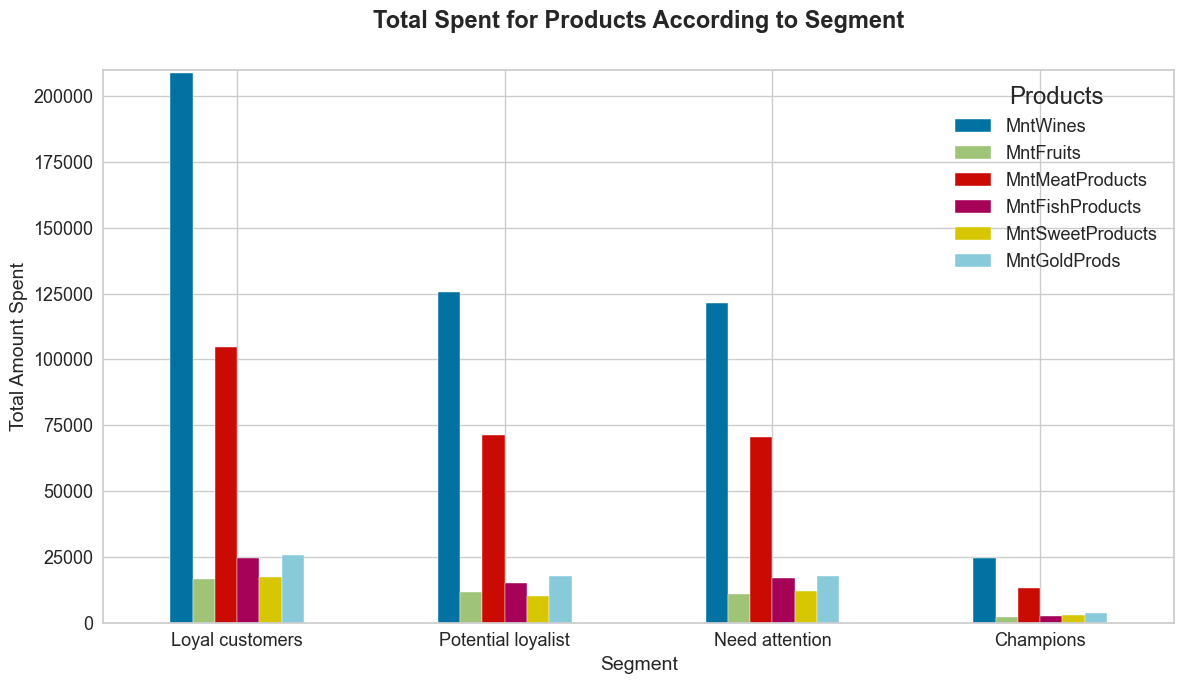

In [126]:
# total spent according to cluster
df_viz = df_foc[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Segment']].groupby(["Segment"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
df_viz.plot(x="Segment", ylabel= "Total", kind="bar", figsize=(12, 7), legend=True, title="Total Spent for Products According to Segment")

# set label & title
plt.ylabel('Total Amount Spent', fontsize=14)
plt.xlabel('Segment', fontsize=14)
plt.title("Total Spent for Products According to Segment", 
          fontsize=17, fontweight='bold', pad=30)

# settings ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xticks(rotation = 0)
plt.yticks(fontsize=13)
plt.ylim(0, 210000)

# settings legend
lg = plt.legend(title="Products", prop = {"size": 13})
title = lg.get_title()
title.set_fontsize('x-large')

# settings grid
ax.grid(visible=False, axis = 'x')

plt.tight_layout()
plt.show()

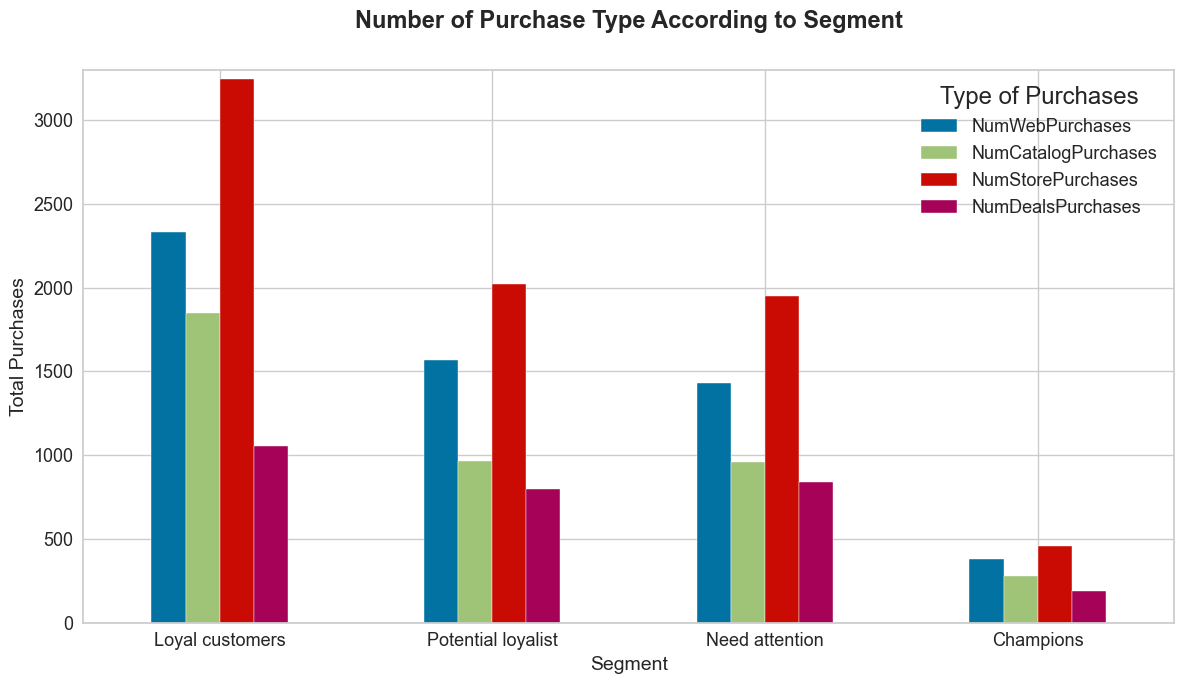

In [127]:
# purchase type according to cluster
df_viz2 = df_foc[["Segment", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"]].groupby(["Segment"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"], ascending=False)
df_viz2.plot(x="Segment", ylabel= "Total", kind="bar", figsize=(12, 7), legend=True, grid=True, 
        title="Number of Purchase Type According to Segment")

# set label & title
plt.ylabel('Total Purchases', fontsize=14)
plt.xlabel('Segment', fontsize=14)
plt.title("Number of Purchase Type According to Segment", 
          fontsize=17, fontweight='bold', pad=30)

# settings ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.xticks(rotation = 0)
plt.yticks(fontsize=13)
plt.ylim(0, 3300)

# settings legend
lg = plt.legend(title="Type of Purchases", prop = {"size": 13})
title = lg.get_title()
title.set_fontsize('x-large')

# settings grid
ax.grid(visible=False, axis = 'x')

plt.tight_layout()
plt.show()

In [128]:
df_viz

,Segment,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1,Loyal customers,208915,16575,104693,24554,17193,25829
3,Potential loyalist,125717,11513,71397,15158,10262,17612
2,Need attention,121472,10852,70439,17155,11916,17853
0,Champions,24408,2173,13306,2623,2822,3506


# **====== STAGE 4 ======**
`Stage 4 (Final Presentation)`

Semua hasil dari EDA, Insight, Classification, Clsutering, dan Business Recommendation yang telah dikerjakan telah dirangkum dalam presentation file yang ada dibawah ini, sebagai approve progress dari final project :

## Final Presentation
**PPT Final Project Presentation Datalicious : [disini](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/PPT%20Final%20Project%20Presentation%20Datalicious.pdf)**

![image](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/18a732be-ab6c-4ac6-b661-857dbd655183)

**========================== ✨ THANK YOU ✨==========================**